<a href="https://colab.research.google.com/github/letpires/bootcamp_alura/blob/main/Bootcamp_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkslateblue">MÓDULO 01**

Neste Notebook foi trabalhado com o Python, Pandas e Matplotlib para explorar os dados financeiros do SUS, mais precisamente os gastos por Unidade Federativa ao longo dos anos. Os desafios se iniciaram na aquisição dos dados em uma plataforma do governo, o processo passou pela leitura destes dados com o Pandas até a criação de hipóteses na área da saúde, que sempre de forma cuidadosa, simulando os desafios diários de uma pessoa cientista de dados.






## Aula 01- Aquisição e leitura de dados reais

Construindo o DataFrame


In [2]:
#Importação das bibliotecas que serão usadas nesse notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

In [3]:
#Mudando a visualização dos números para quando for formatar números com ponto flutuante mostrar sempre com 2 casas decimais

pd.options.display.float_format="{:,.2f}".format  

In [4]:
#Leitura do arquivo e atribuição à uma variável como DataFrame. Arquivo coletado do github e que servirá como base de dados para o Bootcamp.

valores1_csv="https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv"
dados=pd.read_csv(valores1_csv, encoding="ISO-8859-1",
                  skiprows = 3, sep=";", skipfooter=12,
                  thousands=".", decimal=",", na_values="-")

#Parâmetros usados
#1) O parâmetro encoding= "ISO-8859-1" é usado para que os simbolos usados no pt-br(Acentos e 'ç') sejam lidos
#2) O parâmetro skiprows=3 é utilizado para que o arquivo lido pule as três primeiras linhas ao ser lido
#3) O skipfooter=12 tem uma função similar ao skiprows mas serve para remover as linhas de baixo
#4) O parâmetro sep=";" sinaliza ao pandas que ao ler o arquivo separe os dados de acordo com os ";"
#5) Os parâmetros (thousands, decimal) demarcam que os dados númericos não sejam "transformados" em strings \/
#e lidos de forma que os . do arquivo marquem os milhares e a , marque que à sua direita vem marcas decimais 
#6)o parâmetro na_values atribui à um certo caracter (neste caso o -) que seja lido como NaN, ou seja, "vazio"



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
## Mostra os 5 primeiros itens da tabela

dados.head()

Unidade da Federação      2008/Jan  ...      2020/Ago            Total
0          11 Rondônia  1,388,528.39  ... 10,285,455.78   929,129,659.72
1              12 Acre    902,416.00  ...           nan   420,668,039.63
2          13 Amazonas  4,735,529.42  ... 14,726,443.67 1,771,654,871.23
3           14 Roraima    657,889.53  ...  2,826,486.18   305,010,883.18
4              15 Pará 18,864,744.11  ... 39,911,193.02 4,437,115,730.71

[5 rows x 154 columns]

In [6]:
dados.tail()  ## Mostra os 5 últimos itens da tabela

Unidade da Federação      2008/Jan  ...       2020/Ago             Total
22   43 Rio Grande do Sul 30,931,325.46  ... 101,374,341.51 11,958,647,088.33
23  50 Mato Grosso do Sul  5,377,392.11  ...  19,241,624.02  2,172,157,981.36
24         51 Mato Grosso  4,795,299.01  ...  17,790,649.87  2,036,923,784.59
25               52 Goiás 15,310,637.29  ...  43,984,702.05  4,657,350,310.70
26    53 Distrito Federal  4,745,919.19  ...  26,526,196.39  2,429,933,198.76

[5 rows x 154 columns]

In [7]:
dados.mean() #Retorna a média por ano em notação científica

2008/Jan      15,126,846.64
2008/Fev      22,710,158.12
2008/Mar      24,594,187.35
2008/Abr      25,431,957.83
2008/Mai      26,511,245.91
                 ...       
2020/Mai      44,193,633.75
2020/Jun      47,329,994.46
2020/Jul      54,495,511.57
2020/Ago      56,505,034.29
Total      5,993,731,798.30
Length: 153, dtype: float64

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(153), object(1)
memory usage: 32.6+ KB


In [9]:
dados["2008/Ago"] #Para selecionar uma única coluna

0      3,231,494.61
1      2,089,107.14
2      9,352,532.70
3        894,271.18
4     23,341,218.03
5      1,475,551.38
6      5,413,710.38
7     15,195,312.89
8     10,549,176.40
9     27,851,438.72
10    10,640,817.47
11    12,872,578.37
12    35,457,038.66
13     9,373,432.00
14     5,238,398.50
15    46,931,248.28
16    84,722,528.10
17    12,588,595.77
18    50,912,706.60
19   184,854,516.35
20    56,982,774.90
21    31,250,854.33
22    56,113,054.70
23     9,671,553.45
24     9,243,148.81
25    20,650,730.67
26    13,710,857.89
Name: 2008/Ago, dtype: float64

In [10]:
dados["2008/Ago"].mean()

27800320.306666665

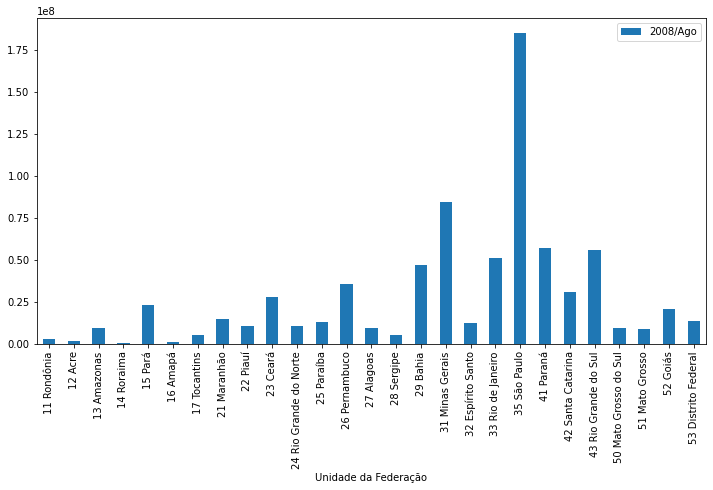

In [11]:
#Para fazer uma visualização dos dados em forma de gráfico é só usar o plot disponível no Pandas. 

dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(12,6))

In [12]:
#Os nomes das UFs estão vindo com um número na frente. Para resolver isso, utilizou-se a função str.slice do pandas.

dados['Unidade da Federação']=dados['Unidade da Federação'].str.slice(start=3)
dados.head()

Unidade da Federação      2008/Jan  ...      2020/Ago            Total
0             Rondônia  1,388,528.39  ... 10,285,455.78   929,129,659.72
1                 Acre    902,416.00  ...           nan   420,668,039.63
2             Amazonas  4,735,529.42  ... 14,726,443.67 1,771,654,871.23
3              Roraima    657,889.53  ...  2,826,486.18   305,010,883.18
4                 Pará 18,864,744.11  ... 39,911,193.02 4,437,115,730.71

[5 rows x 154 columns]

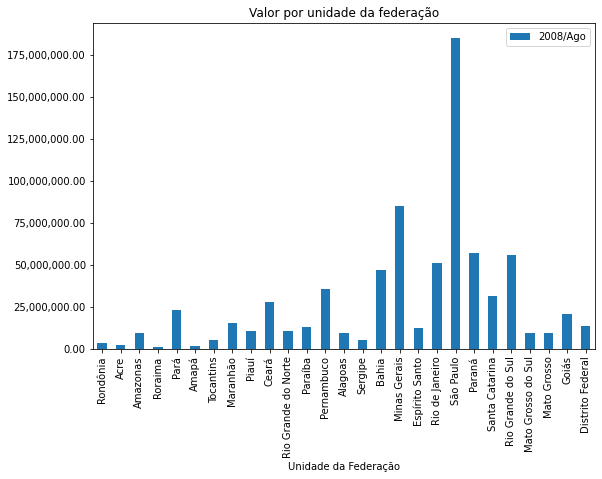

In [13]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()


###Desafio 01: escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

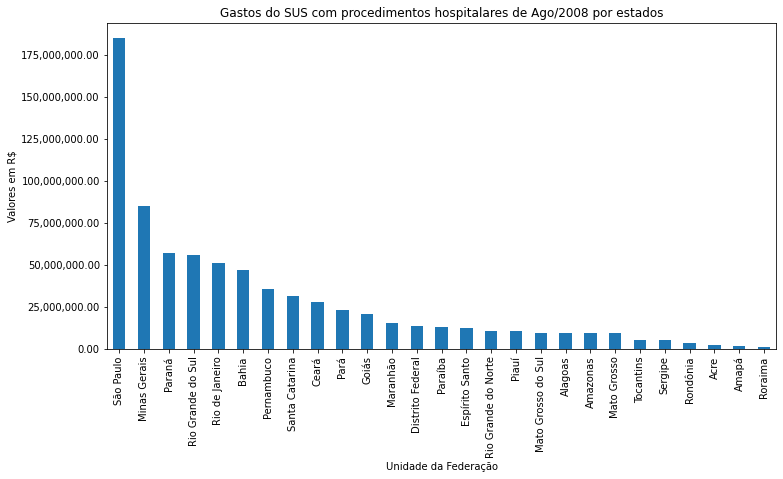

In [14]:



ax = dados.sort_values('2008/Ago', ascending=False).plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(12,6), grid=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Gastos do SUS com procedimentos hospitalares de Ago/2008 por estados")
plt.ylabel('Valores em R$')
plt.legend().remove()


### Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [15]:
dados["2020/Ago"]

0     10,285,455.78
1               nan
2     14,726,443.67
3      2,826,486.18
4     39,911,193.02
5      2,942,273.94
6      8,240,261.38
7     28,587,541.78
8     23,210,624.20
9     59,808,605.59
10    24,929,930.72
11    22,130,016.81
12    75,704,177.72
13    19,754,741.78
14    11,014,180.89
15    80,793,117.08
16   168,024,412.95
17    32,188,873.88
18    95,274,486.35
19   346,512,263.17
20   129,375,911.54
21    63,972,379.36
22   101,374,341.51
23    19,241,624.02
24    17,790,649.87
25    43,984,702.05
26    26,526,196.39
Name: 2020/Ago, dtype: float64

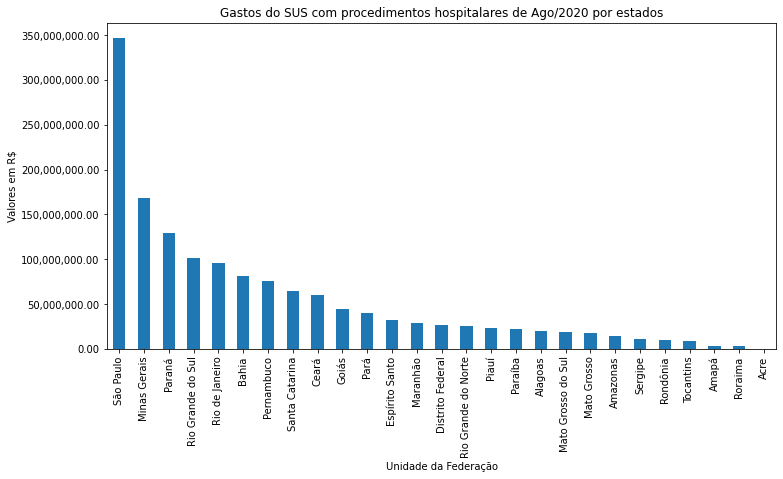

In [16]:
ax = dados.sort_values('2020/Ago', ascending=False).plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(12,6), grid=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Gastos do SUS com procedimentos hospitalares de Ago/2020 por estados")
plt.ylabel('Valores em R$')
plt.legend().remove()


### Desafio EXTRA: Faça uma comparação dos dados de agosto de 2008 e 2020.

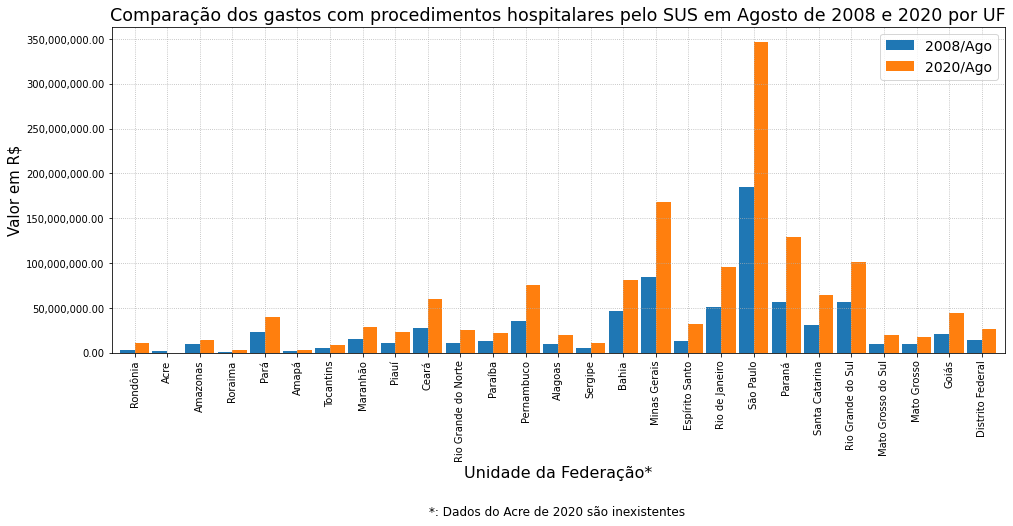

In [17]:
ax = dados.plot(x="Unidade da Federação", y = ["2008/Ago","2020/Ago"], kind = "bar", figsize= (16,6), width = 0.9)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos gastos com procedimentos hospitalares pelo SUS em Agosto de 2008 e 2020 por UF", fontsize = 17.5)
ax.set_ylabel("Valor em R$", fontsize = 15)
ax.set_xlabel("Unidade da Federação*", fontsize = 16)
ax.grid(linestyle = ":")
plt.legend(fontsize = 14)
plt.text(0.355,-0.5,"*: Dados do Acre de 2020 são inexistentes", fontsize = 12, transform=ax.transAxes)
plt.show()

## Aula 02 - Primeiras visualizações de dados

In [18]:
valores2_csv="https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
dados2=pd.read_csv(valores2_csv, encoding="ISO-8859-1",
                  skiprows = 3, sep=";", skipfooter=12,
                  thousands=".", decimal=",", na_values="-" )


dados2.head() ## Mostra os 5 primeiros itens da tabela

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


Unidade da Federação  1992/Mar  ...      2020/Ago            Total
0          11 Rondônia       nan  ...  3,556,381.57   929,129,659.72
1              12 Acre       nan  ...           nan   420,668,039.63
2          13 Amazonas       nan  ...  4,726,485.73 1,771,654,871.23
3           14 Roraima       nan  ...  1,524,478.04   305,010,883.18
4              15 Pará       nan  ... 11,559,714.54 4,437,115,730.71

[5 rows x 280 columns]

In [19]:
dados2.tail()  ## Mostra os 5 últimos itens da tabela

Unidade da Federação  1992/Mar  ...      2020/Ago             Total
22   43 Rio Grande do Sul       nan  ... 28,349,257.38 11,958,647,088.33
23  50 Mato Grosso do Sul       nan  ...  4,059,220.22  2,172,157,981.36
24         51 Mato Grosso       nan  ...  6,174,224.99  2,036,923,784.59
25               52 Goiás       nan  ... 20,242,641.73  4,657,348,958.66
26    53 Distrito Federal       nan  ... 12,044,848.02  2,429,933,198.76

[5 rows x 280 columns]

In [20]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


In [21]:
dados2["2008/Ago"]

0      2,938,286.29
1      1,886,871.84
2      8,331,763.97
3      1,045,291.11
4     23,259,148.28
5      1,550,340.63
6      5,213,290.38
7     14,609,872.57
8     10,645,917.52
9     29,304,821.51
10    10,812,840.19
11    12,673,774.35
12    31,705,296.79
13     9,262,767.68
14     4,543,252.50
15    43,254,543.33
16    80,374,117.08
17    12,384,068.19
18    42,487,939.51
19   179,898,070.22
20    56,699,001.13
21    28,887,854.62
22    56,233,758.74
23     9,602,843.49
24     8,987,811.95
25    21,041,071.33
26    11,548,451.89
Name: 2008/Ago, dtype: float64

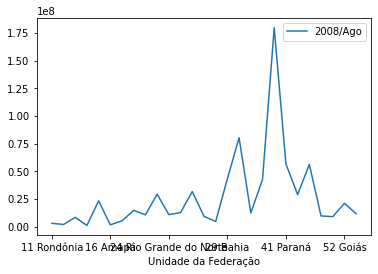

In [22]:
dados2.plot(x="Unidade da Federação", y="2008/Ago")

In [23]:
#Visualizando duas colunas

dados2[["2008/Ago", "2008/Set"]]

2008/Ago       2008/Set
0    2,938,286.29   2,843,930.91
1    1,886,871.84   2,084,884.80
2    8,331,763.97   8,148,089.92
3    1,045,291.11   1,003,740.89
4   23,259,148.28  23,667,690.01
5    1,550,340.63   1,550,166.99
6    5,213,290.38   5,201,400.94
7   14,609,872.57  15,317,881.85
8   10,645,917.52  11,037,940.55
9   29,304,821.51  30,435,026.82
10  10,812,840.19  11,258,681.53
11  12,673,774.35  12,790,639.17
12  31,705,296.79  30,703,879.20
13   9,262,767.68   9,228,201.96
14   4,543,252.50   4,525,676.82
15  43,254,543.33  42,851,268.02
16  80,374,117.08  82,400,146.79
17  12,384,068.19  12,486,952.61
18  42,487,939.51  43,066,461.47
19 179,898,070.22 180,082,203.71
20  56,699,001.13  58,091,985.79
21  28,887,854.62  30,725,718.78
22  56,233,758.74  57,910,170.98
23   9,602,843.49  10,272,466.74
24   8,987,811.95   8,843,061.60
25  21,041,071.33  21,396,098.51
26  11,548,451.89  12,422,577.60

In [24]:
#Foi possível verificar que no DataFrame existem dados vazios que foram substituidos por um valor NaN(Not a Number) ao montar o DataFrame.
#Nesse passo, criamos um novo DataFrame que se baseou no primeiro porém sem nenhuma coluna que tivesse dados NaN
#O dropna retira do df as linhas ou colunas em que os dados estão como NaN
#o parâmetro axis = 1 se refere à coluna, dessa forma foram retirados os meses que continham dados vazios

dados_sliced = dados2.dropna(axis=1)

In [25]:
dados_sliced.head()

Unidade da Federação   2007/Ago  ...      2020/Jul            Total
0          11 Rondônia   4,209.37  ...  7,407,388.24   929,129,659.72
1              12 Acre  10,470.07  ...  1,163,813.08   420,668,039.63
2          13 Amazonas  35,752.72  ... 13,358,514.02 1,771,654,871.23
3           14 Roraima   4,785.91  ...  2,739,498.41   305,010,883.18
4              15 Pará 181,159.29  ... 27,618,727.51 4,437,115,730.71

[5 rows x 158 columns]

In [26]:
# Retirada da coluna Total, pois ela não está agregando ao estudo e somento enviesando os gráficos nesse momento.
#eixo 0 é o eixo da coluna, eixo 1 onde eu quero que ele procure.
#Observe que no final a linha sobe muito. Isso é porque ele está considerando com o valor total. Para resolver isso, utilizamos o drop pra remover a linha Total.

dados_sliced=dados_sliced.drop("Total", axis=1)
dados_sliced.head()

Unidade da Federação   2007/Ago  ...      2020/Jun      2020/Jul
0          11 Rondônia   4,209.37  ...  9,193,593.76  7,407,388.24
1              12 Acre  10,470.07  ...  2,199,920.70  1,163,813.08
2          13 Amazonas  35,752.72  ... 17,509,334.66 13,358,514.02
3           14 Roraima   4,785.91  ...  3,216,466.51  2,739,498.41
4              15 Pará 181,159.29  ... 35,396,030.78 27,618,727.51

[5 rows x 157 columns]

In [27]:
#Foi selecionada a coluna "Unidade da Federação" para servir como Index do DataFrame
dados_sliced.set_index("Unidade da Federação", inplace=True)
dados_sliced.head()

2007/Ago   2007/Set  ...      2020/Jun      2020/Jul
Unidade da Federação                        ...                            
11 Rondônia            4,209.37  16,397.03  ...  9,193,593.76  7,407,388.24
12 Acre               10,470.07  14,001.71  ...  2,199,920.70  1,163,813.08
13 Amazonas           35,752.72  45,570.64  ... 17,509,334.66 13,358,514.02
14 Roraima             4,785.91  11,858.63  ...  3,216,466.51  2,739,498.41
15 Pará              181,159.29 433,414.74  ... 35,396,030.78 27,618,727.51

[5 rows x 156 columns]

In [28]:
#Utilizar o .index pra checar se os dados que estão no index correspondem a Unidade da Federação
dados_sliced.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [29]:
#Exibindo dados de uma coluna selecionada, colocando o index o UF, é possivel exibir a series sempre mostrando o UF referente.

dados_sliced["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8,909,111.89
12 Acre        2,981,072.98
13 Amazonas   16,493,719.52
14 Roraima     3,181,321.82
15 Pará       36,462,011.47
Name: 2019/Ago, dtype: float64

In [30]:
 #Foi feita mesma coisa que a linha de código anterior, porém considerando outro index.

dados_sliced.loc["12 Acre"]   

2007/Ago      10,470.07
2007/Set      14,001.71
2007/Out      86,200.85
2007/Nov     301,323.68
2007/Dez     769,612.36
               ...     
2020/Mar   2,859,102.06
2020/Abr   2,472,063.08
2020/Mai   2,383,895.48
2020/Jun   2,199,920.70
2020/Jul   1,163,813.08
Name: 12 Acre, Length: 156, dtype: float64

In [31]:
dados_sliced.head()

2007/Ago   2007/Set  ...      2020/Jun      2020/Jul
Unidade da Federação                        ...                            
11 Rondônia            4,209.37  16,397.03  ...  9,193,593.76  7,407,388.24
12 Acre               10,470.07  14,001.71  ...  2,199,920.70  1,163,813.08
13 Amazonas           35,752.72  45,570.64  ... 17,509,334.66 13,358,514.02
14 Roraima             4,785.91  11,858.63  ...  3,216,466.51  2,739,498.41
15 Pará              181,159.29 433,414.74  ... 35,396,030.78 27,618,727.51

[5 rows x 156 columns]

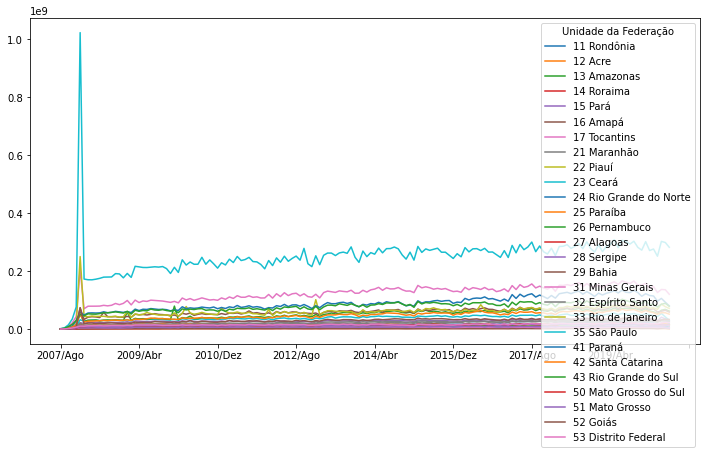

In [32]:
#a função T faz com que os eixos x e y sejam invertidos, jogando as datas para o index e os UF para as colunas

dados_sliced.T.plot(figsize=(12,6))

###Desafio 03: Reposicionar a legenda da melhor forma

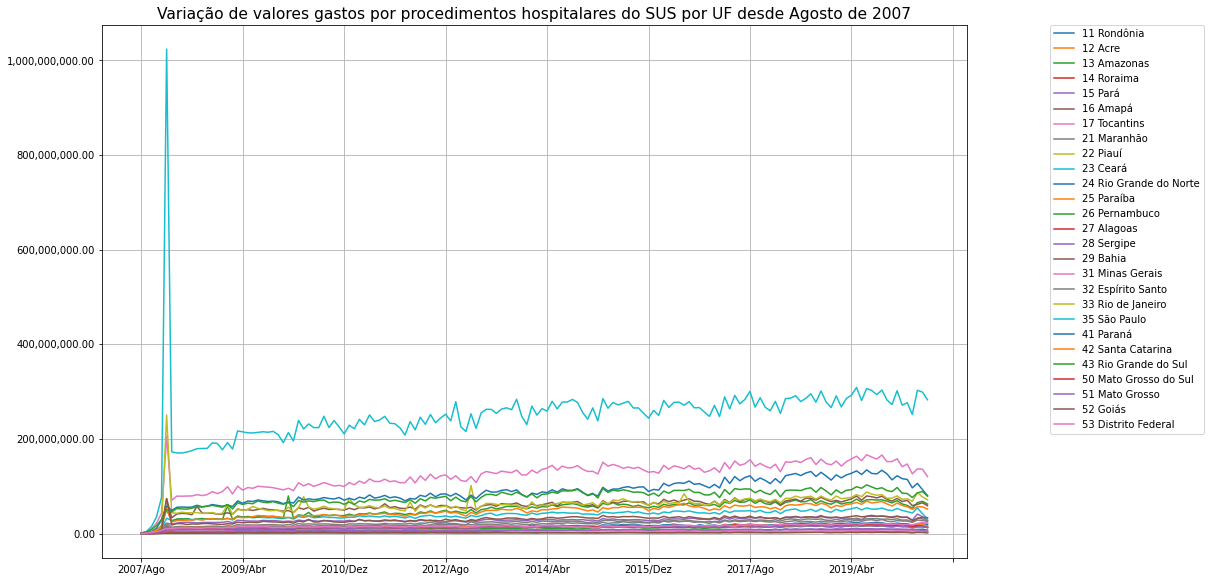

In [33]:
# O parâmetro bbox_to_anchor do plt.legend permite atribuição de valores que correspondem à localização da legenda no gráfico.

ax=dados_sliced.T.plot(figsize=(15.5,9.80), grid =True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Agosto de 2007", fontsize=15.5)
plt.legend(bbox_to_anchor=(1.28,1.01), loc="upper right")
plt.show()

###Desafio 04: Plotar o gráfico de linha com apenas 5 estados de sua preferência

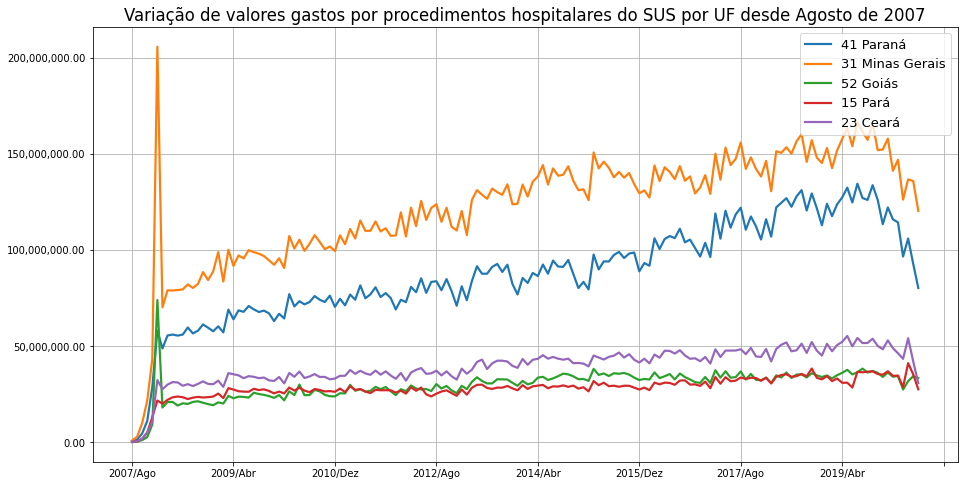

In [34]:
ax=dados_sliced.loc[['41 Paraná', '31 Minas Gerais', '52 Goiás', '15 Pará', '23 Ceará']].T.plot(figsize=(15.5,8), grid=True, linewidth=2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Agosto de 2007", fontsize=16.5)
plt.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize=13)
plt.show()

###Desafio EXTRA: Plotar o gráfico de linha dos estados separados por região

In [35]:
#Criação de váriaveis para as regiões geográficas do país em formato de lista

norte = ['11 Rondônia', '12 Acre', '13 Amazonas', 
         '14 Roraima', '15 Pará','16 Amapá', '17 Tocantins']
nordeste = ['21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', 
       '27 Alagoas', '28 Sergipe', '29 Bahia']
sudeste = ['31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo']
sul = ['41 Paraná', '42 Santa Catarina','43 Rio Grande do Sul']
centro_oeste = ['50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal']

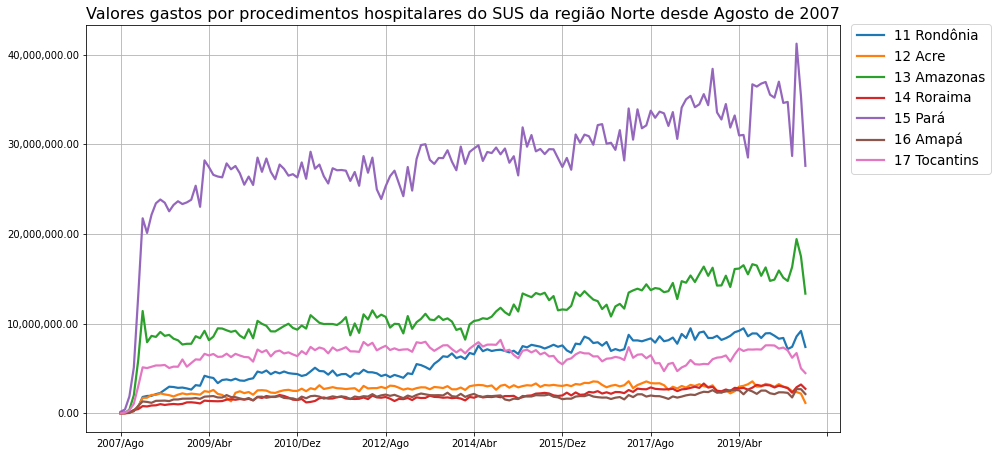

In [36]:
ax = dados_sliced.loc[norte].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Norte desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.21, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

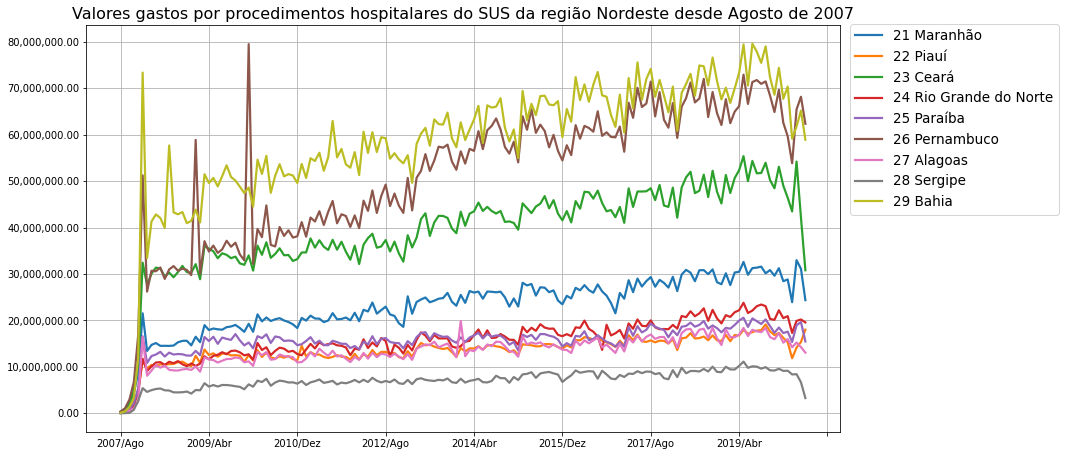

In [37]:
ax = dados_sliced.loc[nordeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Nordeste desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.3, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

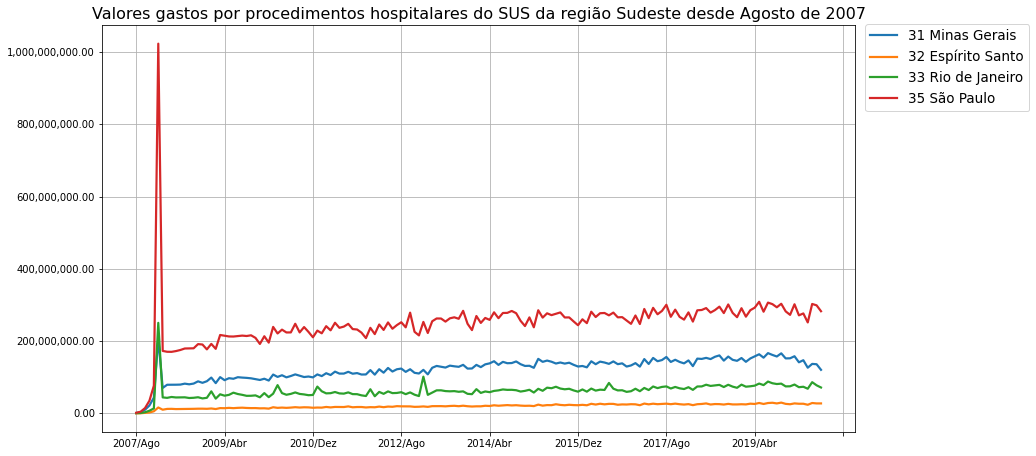

In [38]:
ax = dados_sliced.loc[sudeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Sudeste desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.24, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

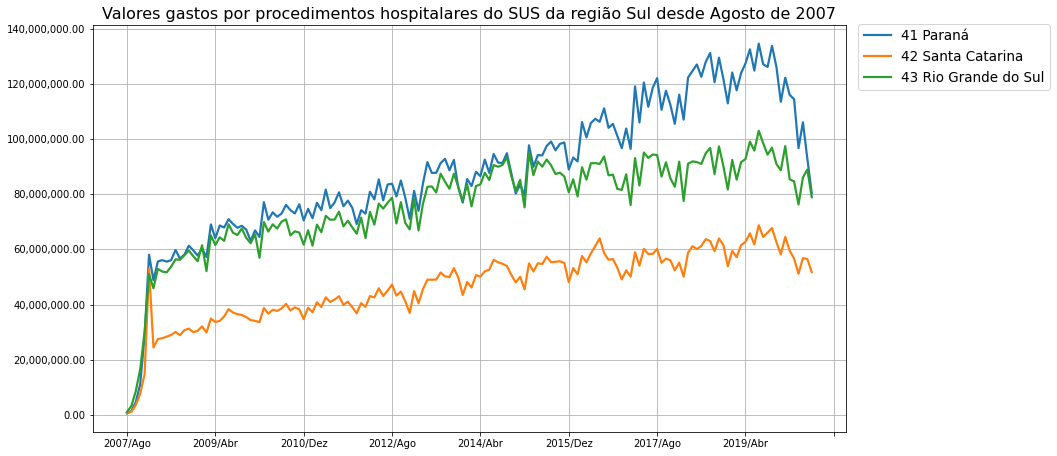

In [39]:
ax = dados_sliced.loc[sul].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Sul desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.28, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

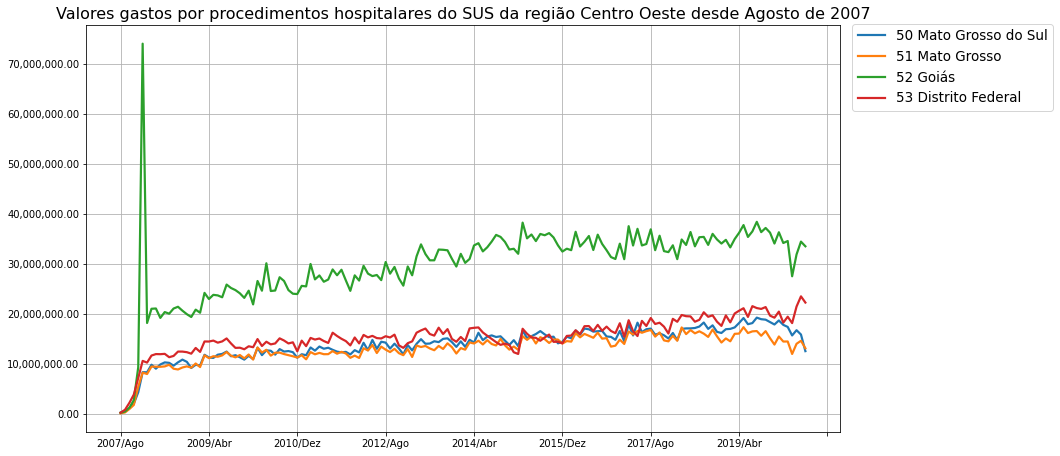

In [40]:
ax = dados_sliced.loc[centro_oeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Centro Oeste desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.292, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

##Aula 03 - Manipulação de Dados

In [41]:
#Para visualizar o index depois de aplicar o T e mostrar os 5 primeiros dados:
#[:5] significa que é pra pegar os valores do 0 (não precisa aparecer) até o 5 (sem incluir o 5)

dados_sliced.T.index[:5]

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez'], dtype='object')

In [42]:
#Para visualizar os nomes das colunas depois de aplicar o T e mostrar os 5 primeiros dados:

dados_sliced.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

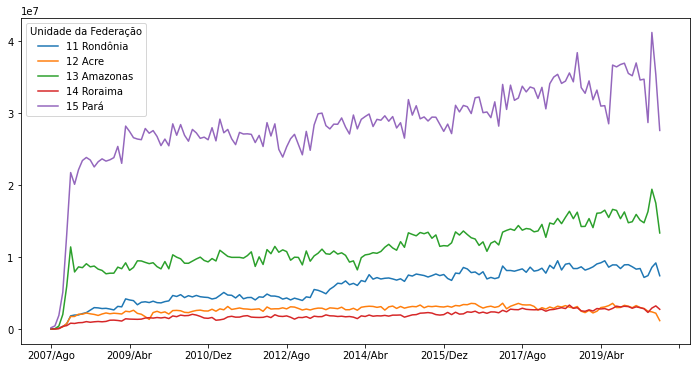

In [43]:
#Essa é uma forma de plotar o gráfico dos 5 primeiros UFs, colocando o [:5] pra selecionar os 5 primeiros (na ordem que veio no df)

dados_sliced[:5].T.plot(figsize=(12,6))

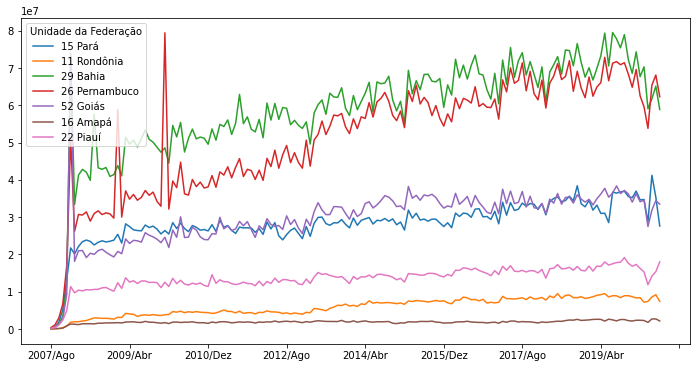

In [44]:
#O np.random.seed gera um valor aleatório para a função sample

np.random.seed(2687)
dados_sliced.sample(n=7).T.plot(figsize=(12,6))

In [45]:
#Criação da coluna "Total" somando as informações por UF
dados_sliced["Total"] = dados_sliced.sum(axis=1)

#Reorganizar o DataFrame de acordo com os valores totais, sendo o maior o primeiro
dados_ordenado_por_total = dados_sliced.sort_values(by="Total",ascending=False)



#Retirada a coluna "Total" do df para não atrapalhar a plotagem
dados_ordenado_por_total.drop("Total", axis=1,inplace=True)

#Ver o df ordenado
dados_ordenado_por_total.head()

2007/Ago     2007/Set  ...       2020/Jun       2020/Jul
Unidade da Federação                            ...                              
35 São Paulo         1,665,349.90 4,434,168.64  ... 299,060,851.62 282,709,570.31
31 Minas Gerais        971,394.37 2,861,781.50  ... 135,977,571.87 120,467,187.34
41 Paraná              554,800.22 1,431,708.01  ...  92,901,461.36  80,320,852.69
43 Rio Grande do Sul 1,049,252.33 3,182,913.14  ...  89,019,478.82  78,929,703.81
33 Rio de Janeiro      469,469.34   921,646.57  ...  77,604,925.21  71,540,227.33

[5 rows x 156 columns]

In [46]:
dados_ordenado_por_total

2007/Ago     2007/Set  ...       2020/Jun       2020/Jul
Unidade da Federação                              ...                              
35 São Paulo           1,665,349.90 4,434,168.64  ... 299,060,851.62 282,709,570.31
31 Minas Gerais          971,394.37 2,861,781.50  ... 135,977,571.87 120,467,187.34
41 Paraná                554,800.22 1,431,708.01  ...  92,901,461.36  80,320,852.69
43 Rio Grande do Sul   1,049,252.33 3,182,913.14  ...  89,019,478.82  78,929,703.81
33 Rio de Janeiro        469,469.34   921,646.57  ...  77,604,925.21  71,540,227.33
29 Bahia                 135,146.36   448,349.75  ...  65,159,300.63  58,898,100.40
26 Pernambuco            400,640.85 1,088,340.42  ...  68,145,110.59  62,325,444.34
42 Santa Catarina        693,955.05 1,092,964.12  ...  56,503,747.99  51,764,534.76
23 Ceará                 357,904.65   572,356.18  ...  42,146,555.81  30,809,221.22
52 Goiás                 179,395.82   418,053.58  ...  34,437,633.20  33,499,284.38
15 Pará                  181,159.29   433,414.74  ...  35,396,030.78  27,618,727.51
21 Maranhão              385,330.18 1,018,352.93  ...  31,128,144.66  24,374,205.15
32 Espírito Santo         57,408.11   284,224.80  ...  27,450,865.16  27,460,475.47
24 Rio Grande do Norte   134,605.36   272,088.08  ...  20,219,961.81  19,593,057.45
25 Paraíba                97,352.78   368,130.43  ...  19,666,096.87  15,491,469.06
53 Distrito Federal      191,951.47   769,966.25  ...  23,479,773.03  22,233,542.26
50 Mato Grosso do Sul    199,556.12   573,675.41  ...  15,838,659.34  12,508,717.35
22 Piauí                 220,788.25   353,468.67  ...  15,375,523.59  18,019,214.49
27 Alagoas               104,243.75   174,024.90  ...  14,278,872.07  13,087,850.40
51 Mato Grosso            63,562.50   232,444.62  ...  14,585,009.42  13,083,151.70
13 Amazonas               35,752.72    45,570.64  ...  17,509,334.66  13,358,514.02
28 Sergipe                27,453.63    78,565.19  ...   6,705,923.03   3,312,766.32
17 Tocantins               4,113.76    76,633.06  ...   5,018,138.13   4,489,665.87
11 Rondônia                4,209.37    16,397.03  ...   9,193,593.76   7,407,388.24
12 Acre                   10,470.07    14,001.71  ...   2,199,920.70   1,163,813.08
14 Roraima                 4,785.91    11,858.63  ...   3,216,466.51   2,739,498.41
16 Amapá                  33,672.74   104,822.98  ...   2,699,492.23   2,155,083.37

[27 rows x 156 columns]

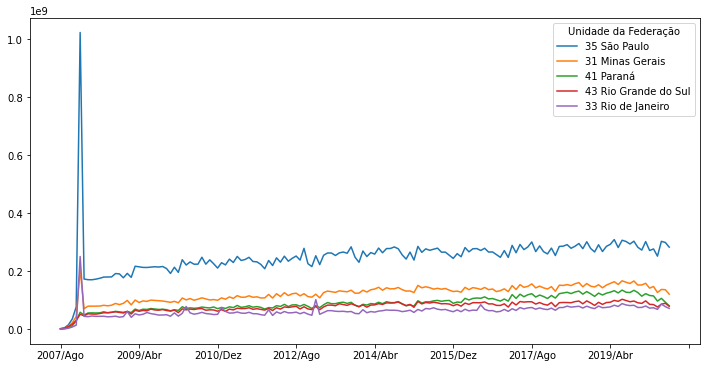

In [47]:
#Plotar o gráfico que representa os dados desde 2007 ordenados

dados_ordenado_por_total.head().T.plot(figsize=(12,6))

In [48]:
#Cortar os dados para retirar os dados que estão destoando dos outros, deixando à partir de fev/2008
#Note que tem uns valores a partir de Jan/2008 com uns valores absurdos, 

colunas_usaveis = dados_ordenado_por_total.columns[6:]
dados_usaveis = dados_ordenado_por_total[colunas_usaveis]
dados_usaveis.head()

2008/Fev  ...       2020/Jul
Unidade da Federação                 ...               
35 São Paulo         172,834,914.73  ... 282,709,570.31
31 Minas Gerais       70,301,089.50  ... 120,467,187.34
41 Paraná             48,855,046.46  ...  80,320,852.69
43 Rio Grande do Sul  45,897,704.82  ...  78,929,703.81
33 Rio de Janeiro     44,122,593.19  ...  71,540,227.33

[5 rows x 150 columns]

In [49]:
dados_usaveis=dados_usaveis/1000000

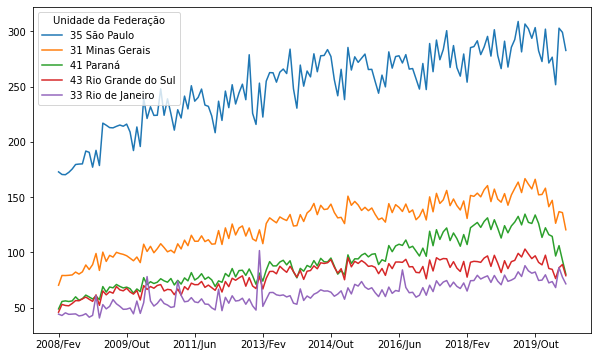

In [50]:
dados_usaveis.head(5).T.plot(figsize=(10,6))

###Desafio 05: Mudar a paleta de cores utilizando matplotlib

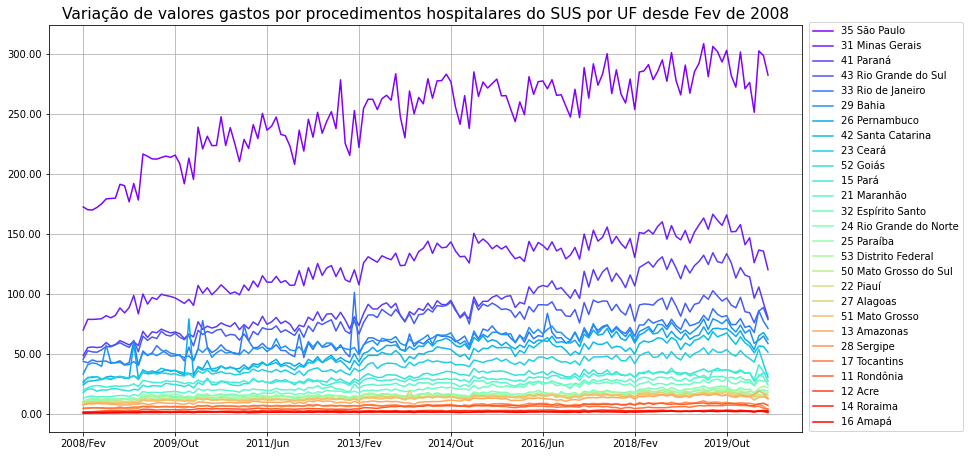

In [51]:
#Plotar o gráfico de todos os UFs mostrando a mudança dos dados e colocando uma cor que diferencie

ax = dados_usaveis.T.plot(figsize=(13.5,7.48), grid = True, cmap = 'rainbow' )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Fev de 2008", fontsize = 15.5)
plt.legend(bbox_to_anchor=(1.22, 1.02), loc = "upper right")
plt.show()

###Desafio 06: Adicionar uma coluna mostrando a região (Norte, Nordeste, Sul, Sudeste e Centro-oeste) de cada estado

In [52]:
#Os UFs tem números que referenciam a sua região. 
#OS UFs da dezena 10 é da região norte, 20 nordeste, 30 sudeste, 40 sul e 50 é centro-oeste

#Criação de um dicionário em que a primeira casa da dezena de seus UFs é o key que condiz com o nome da Região
regiao = {1:"Norte",2:"Nordeste",3:"Sudeste", 4: "Sul",5:"Centro-Oeste"}
regiao

{1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}

In [53]:
#Criar uma nova coluna com nome Região e pegar a primeira string do index daquela linha, 
#assim pegar a coluna fica com o número da dezena condizente à sua região
dados_usaveis["Regiao"] = dados_usaveis.index.str[0]
dados_usaveis.head()

2008/Fev  2008/Mar  2008/Abr  ...  2020/Jun  2020/Jul  Regiao
Unidade da Federação                                ...                            
35 São Paulo            172.83    170.48    170.28  ...    299.06    282.71       3
31 Minas Gerais          70.30     79.12     79.05  ...    135.98    120.47       3
41 Paraná                48.86     55.61     56.12  ...     92.90     80.32       4
43 Rio Grande do Sul     45.90     52.93     51.97  ...     89.02     78.93       4
33 Rio de Janeiro        44.12     42.89     45.30  ...     77.60     71.54       3

[5 rows x 151 columns]

In [54]:
#O lambda itera sobre a coluna "Região" e substitui o valor da dezena pelo nome da região, buscando a informação do dicionário regiao
dados_usaveis["Regiao"] = dados_usaveis["Regiao"].map(lambda x: regiao[int(x)])
dados_usaveis.head()
#dados_usaveis["Regiao"]

2008/Fev  2008/Mar  2008/Abr  ...  2020/Jun  2020/Jul   Regiao
Unidade da Federação                                ...                             
35 São Paulo            172.83    170.48    170.28  ...    299.06    282.71  Sudeste
31 Minas Gerais          70.30     79.12     79.05  ...    135.98    120.47  Sudeste
41 Paraná                48.86     55.61     56.12  ...     92.90     80.32      Sul
43 Rio Grande do Sul     45.90     52.93     51.97  ...     89.02     78.93      Sul
33 Rio de Janeiro        44.12     42.89     45.30  ...     77.60     71.54  Sudeste

[5 rows x 151 columns]

###Desafio 07: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável

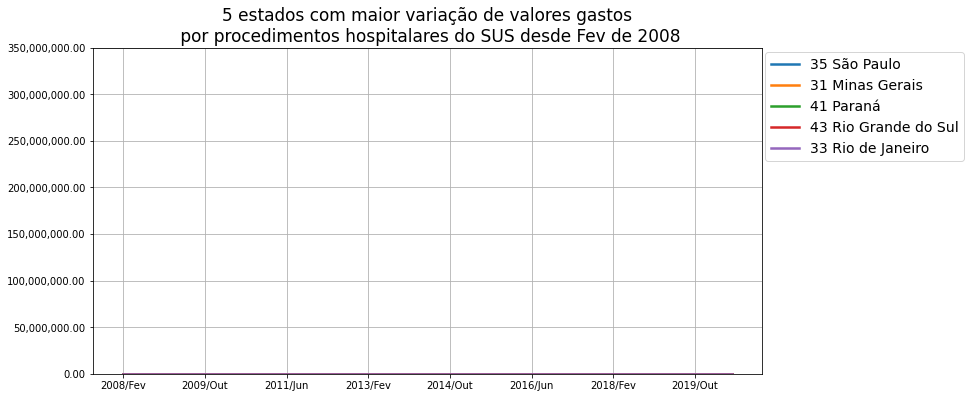

In [55]:
ax = dados_usaveis.head().T[:150].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("5 estados com maior variação de valores gastos\n por procedimentos hospitalares do SUS desde Fev de 2008", fontsize = 17)
plt.legend(bbox_to_anchor=(1.312,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,350000000)
plt.show()

###Desafio 08: Adicione o seu estado aos 5 estados plotados anteriormente

In [56]:
meu_estado = '42 Santa Catarina'
dados_do_desafio = dados_usaveis.head().T
dados_do_desafio

Unidade da Federação 35 São Paulo  ... 33 Rio de Janeiro
2008/Fev                   172.83  ...             44.12
2008/Mar                   170.48  ...             42.89
2008/Abr                   170.28  ...             45.30
2008/Mai                   172.40  ...             43.95
2008/Jun                   175.42  ...             44.10
...                           ...  ...               ...
2020/Abr                   251.70  ...             68.16
2020/Mai                   302.86  ...             86.28
2020/Jun                   299.06  ...             77.60
2020/Jul                   282.71  ...             71.54
Regiao                    Sudeste  ...           Sudeste

[151 rows x 5 columns]

In [57]:
dados_do_desafio[meu_estado] = dados_usaveis.loc[meu_estado]
dados_do_desafio

Unidade da Federação 35 São Paulo  ... 42 Santa Catarina
2008/Fev                   172.83  ...             24.41
2008/Mar                   170.48  ...             27.48
2008/Abr                   170.28  ...             27.81
2008/Mai                   172.40  ...             28.35
2008/Jun                   175.42  ...             28.99
...                           ...  ...               ...
2020/Abr                   251.70  ...             51.18
2020/Mai                   302.86  ...             56.84
2020/Jun                   299.06  ...             56.50
2020/Jul                   282.71  ...             51.76
Regiao                    Sudeste  ...               Sul

[151 rows x 6 columns]

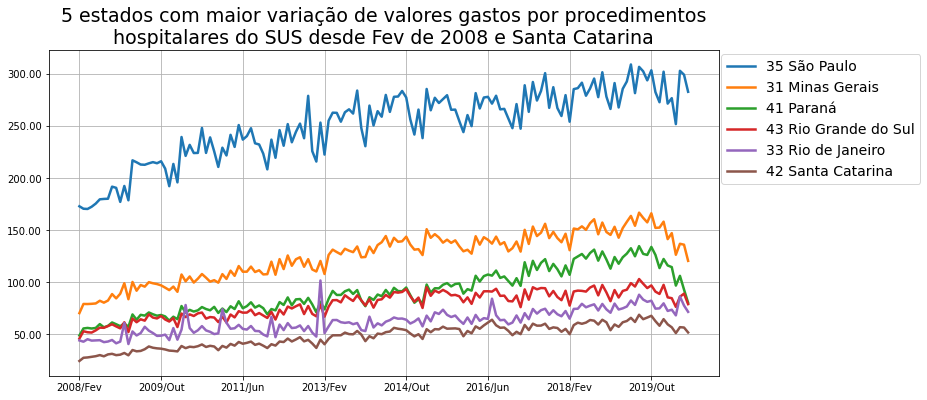

In [58]:
ax = dados_do_desafio[:150].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("5 estados com maior variação de valores gastos por procedimentos\nhospitalares do SUS desde Fev de 2008 e Santa Catarina", fontsize = 19)
plt.legend(bbox_to_anchor=(1.312,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.show()

###Desafio 09: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Dados para estuo de São Paulo obtidos no site https://www.gov.br/saude/pt-br/assuntos/noticias/cresce-em-264-o-numero-de-casos-de-dengue-no-pais#denguee , que é um site institucional da União Federativa Brasileira

###Desafio 10: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região.

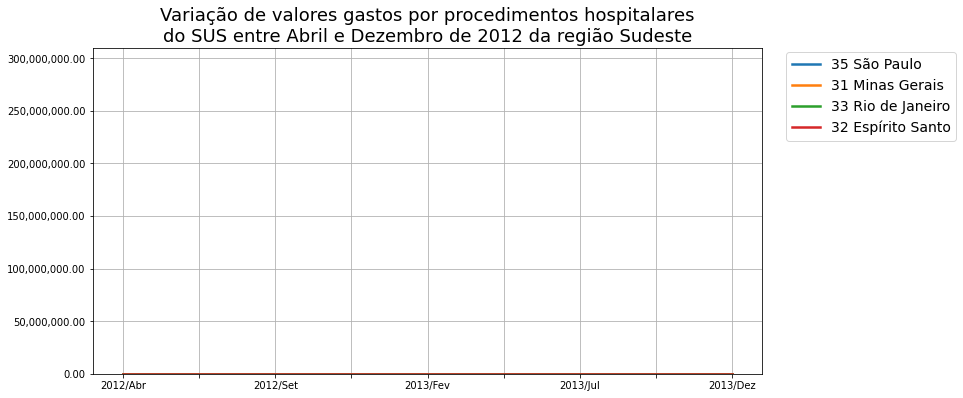

In [59]:
ax = dados_usaveis.query("Regiao == 'Sudeste'").T[50:71].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares\ndo SUS entre Abril e Dezembro de 2012 da região Sudeste", fontsize = 18)
plt.legend(bbox_to_anchor=(1.30,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,310000000)
plt.show()

Somente do estado do Rio de Janeiro apresentou um pico de gastos no mês de Janeiro de 2013.

Tirando o estado de Espírito Santo, os estados: Minas Gerais e São Paulo tiveram um aumento de gastos em relação ao mês anterior e também ao mês seguinte, porém não acima da média de gastos do periodo que foi plotado o gráfico, de Abril de 2012 até Dezembro de 2013.

###Desafio 11: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais.


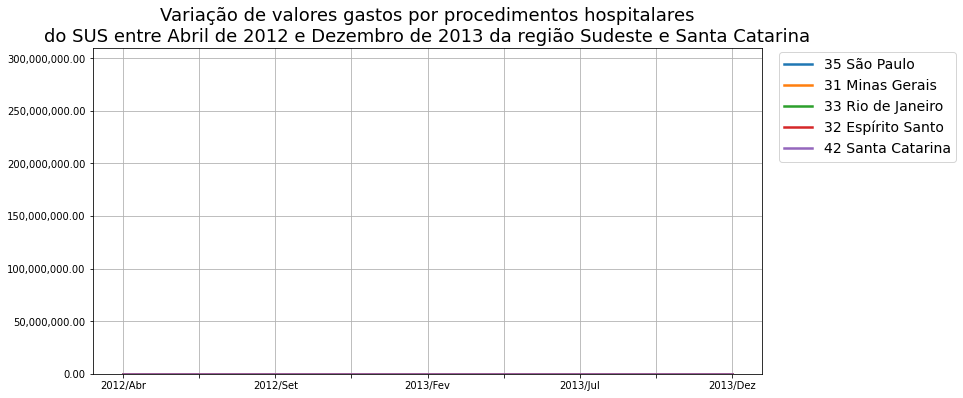

In [60]:
meu_estado = '42 Santa Catarina'
dados_do_desafio = dados_usaveis.query("Regiao == 'Sudeste'").T
dados_do_desafio[meu_estado] = dados_usaveis.loc[meu_estado]
ax = dados_do_desafio[50:71].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares\ndo SUS entre Abril de 2012 e Dezembro de 2013 da região Sudeste e Santa Catarina", fontsize = 18)
plt.legend(bbox_to_anchor=(1.30,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,310000000)
plt.show()

##Aula 04 - Análise de gráficos e criação de hipótese

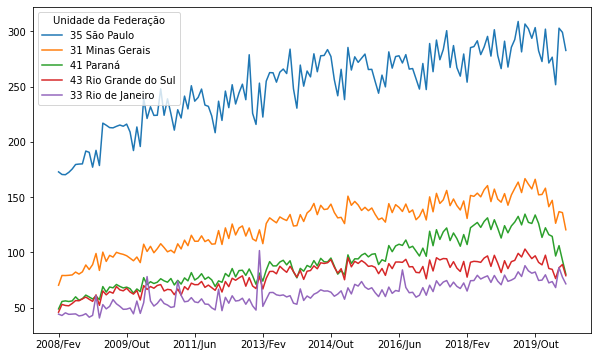

In [61]:
# Vamos dividir o valor por 1milhão para deixar os dados mais visíveis.

dados_usaveis=dados_usaveis.drop("Regiao", axis=1)
#dados_usaveis = dados_usaveis / 1000000
dados_usaveis.head(5).T.plot(figsize=(10,6))

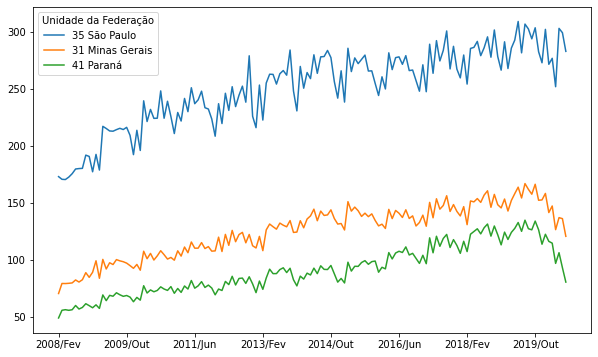

In [62]:
dados_usaveis.head(3).T.plot(figsize=(10,6))

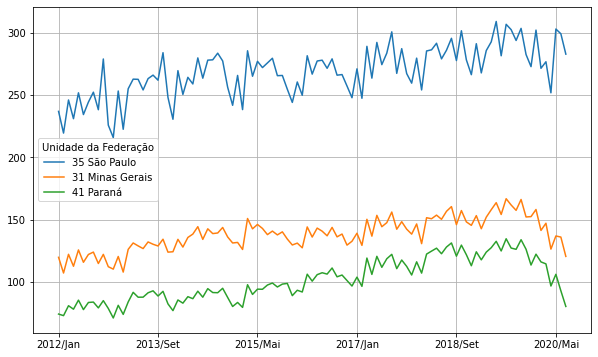

In [63]:
# Selecionou-se somente alguns meses pra visualizar os gráficos.
# Isso pode apresentar uma problemática, pois limita a visão total dos dados

meses_filtrados = dados_usaveis.columns[47:150] 
dados_usaveis[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)

(0.0, 350.0)

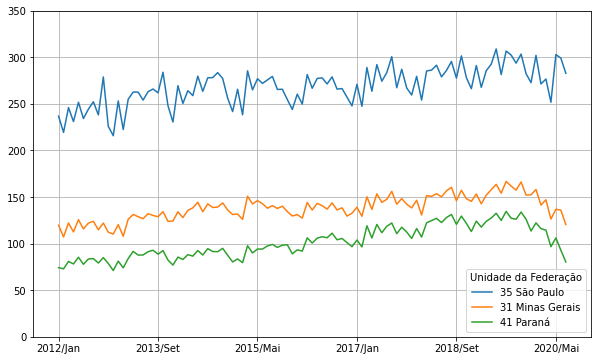

In [64]:
# Em seguida, colocou-se os valores à partir do 0.

meses_filtrados = dados_usaveis.columns[47:150] 
dados_usaveis[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(100.0, 350.0)

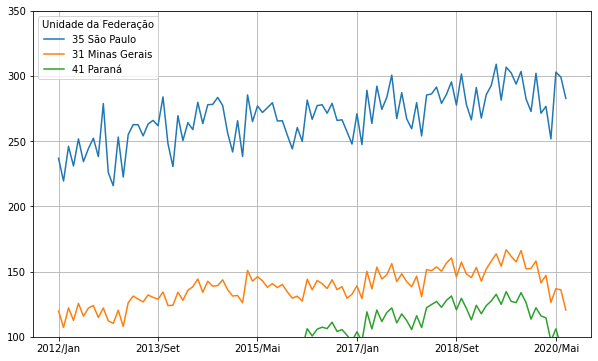

In [65]:
# Cortamos o valor do eixo y para mostrar somente dos valores 100 até 350
# O problema de fazer isso é que a gente novamente limita e passa uma mensagem errada
# Podendo passar a mensagem que Minas Gerais tem um gasto muito baixo

meses_filtrados = dados_usaveis.columns[47:150] 
dados_usaveis[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(100,350)

(0.0, 350.0)

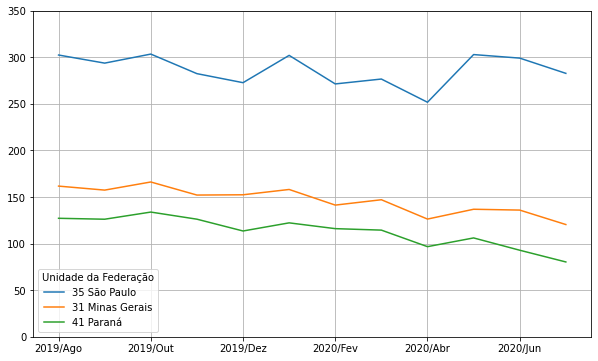

In [66]:
# Exibição dos ultimos 12 meses dos dados

dados_usaveis[dados_usaveis.columns[-12:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

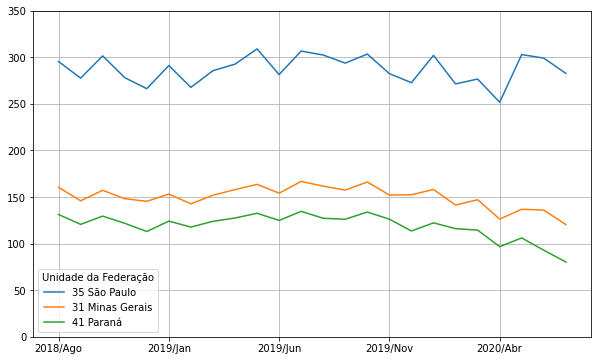

In [67]:
# Exibição dos últimos 2 anos, 24 meses

dados_usaveis[dados_usaveis.columns[-24:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

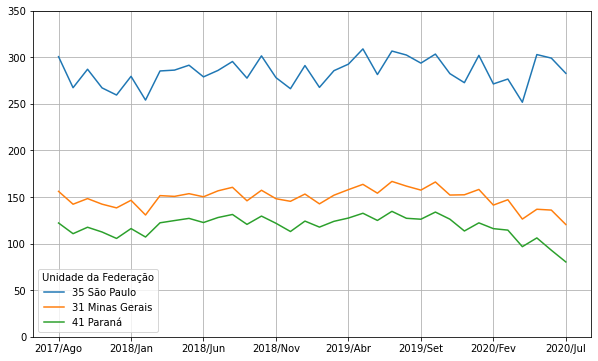

In [68]:
# Plotar dados dos ultimos 3 anos

dados_usaveis[dados_usaveis.columns[-36:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

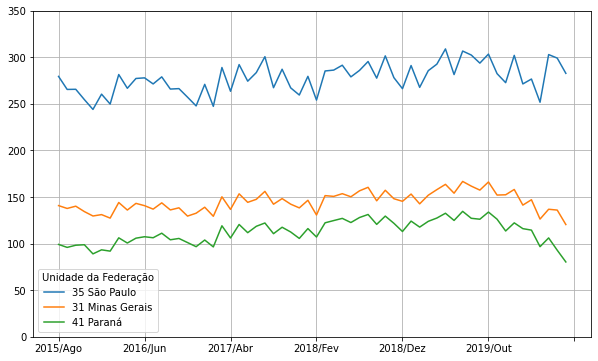

In [69]:
# Exibição dos ultimos 5 anos, 60 meses.

dados_usaveis[dados_usaveis.columns[-60:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

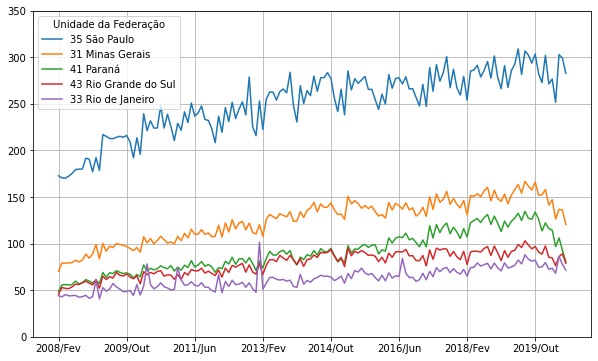

In [70]:
# Comparar os gráficos com tamanhos diferentes
# Com uma visualização normal, numa largura legal

dados_usaveis.head(5).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

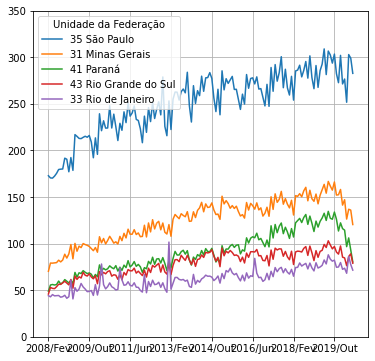

In [71]:
# Comparar os gráficos com tamanhos diferentes
# Um gráfico quadrado compacta os dados

dados_usaveis.head(5).T.plot(figsize = (6,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

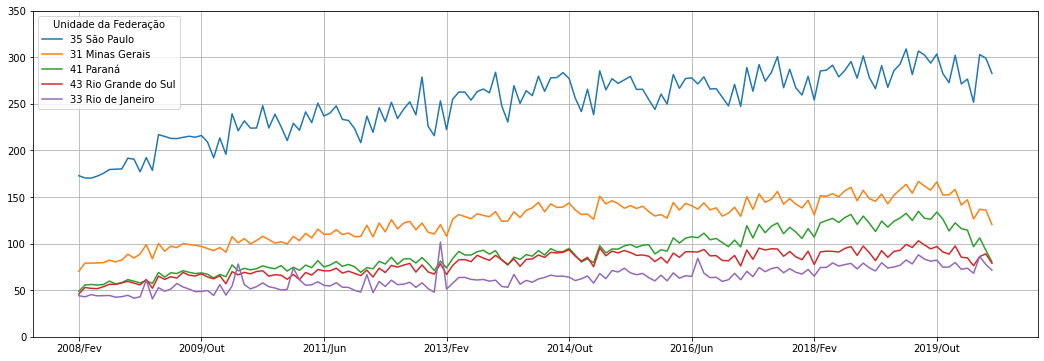

In [72]:
#Comparar os gráficos com tamanhos diferentes
#Um gráfico bem largo pra mostrar os dados

dados_usaveis.head(5).T.plot(figsize = (18,6), grid=True)
plt.ylim(0,350)

## Aula 05 - Manipulação e Interpretação de Gráficos

In [73]:
mes_mais_recente = dados_ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [74]:
gastos_do_mais_recente = dados_ordenado_por_total[mes_mais_recente]/1000000
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

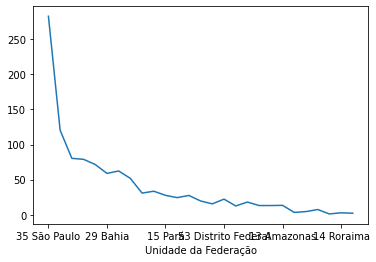

In [75]:
gastos_do_mais_recente.plot()

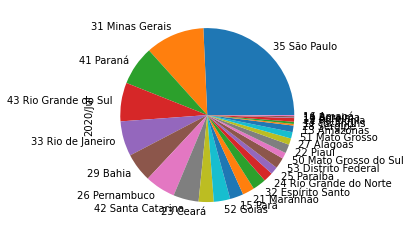

In [76]:
gastos_do_mais_recente.plot(kind='pie')

Horrores da pizza:
*   Legenda está horrível
*   O número de fatias é inacreditável.

Vantagem:

*   O gráfico já está ordenado




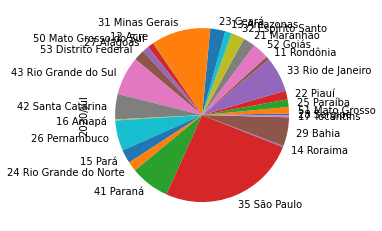

In [77]:
# Aplicando o sample pra gerar aleatoriedade e perceber que não dá pra gerar nenhum insight com esse gráfico.
# Tem cores repetidas, legenda horrível, não dá pra saber a ordem, péssimo para comparar os estados.

gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

In [78]:
# Visualização simples pra valor absoluto.

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

In [79]:
#Tabela de criação levando em consideração um estado de referencia

gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

In [80]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]).head()

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/Jul, dtype: float64

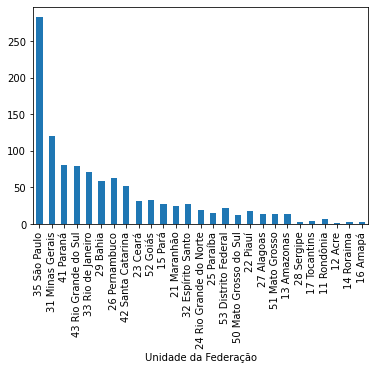

In [81]:
#Ordenou pelo gasto total de todos os anos, por isso não está em ordem crescente

gastos_do_mais_recente.plot(kind='bar')

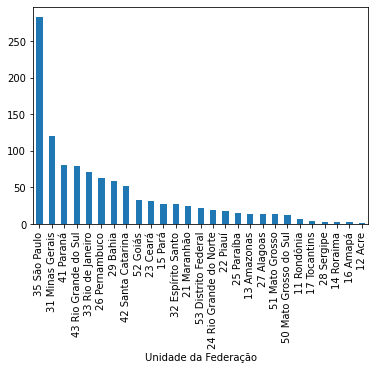

In [82]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

###Desafio 13: Buscar na documentação do Matplotlib  como colocar um grid nos gráficos e adicionar nos gráficos de barra.

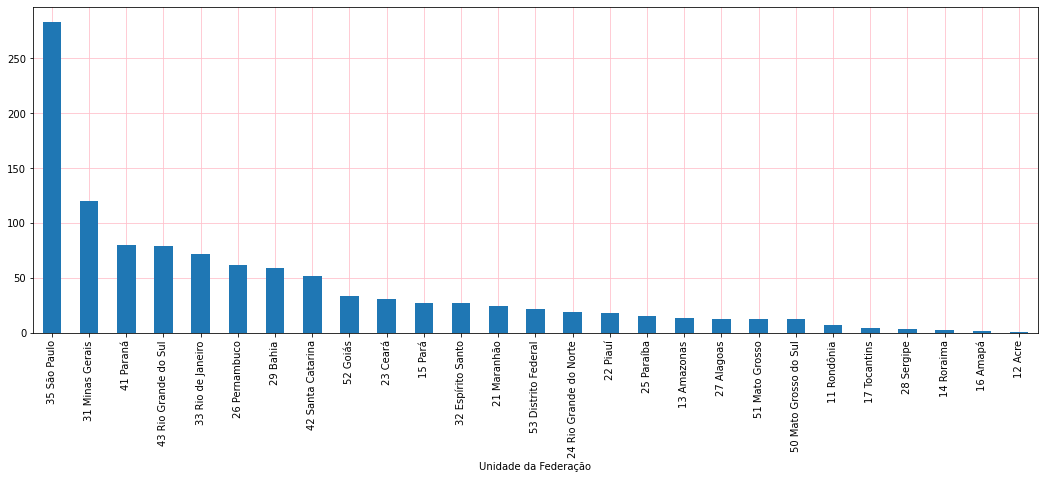

In [83]:
#Utilizando o parâmetro grid é possível colocar um grid no gráfico

ax = gastos_do_mais_recente.sort_values(ascending=False). plot(figsize=(18,6), kind="bar")
ax.set_axisbelow(True)
ax.yaxis.grid(color='pink')
ax.xaxis.grid(color="pink")

### Desafio 14: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou de qualquer outro de interesse.

In [84]:
#Transformando a série gastos_do_mais_recente em um DataFrame

gastos_do_mais_recente1 = pd.DataFrame (gastos_do_mais_recente)
gastos_do_mais_recente1

2020/Jul
Unidade da Federação            
35 São Paulo              282.71
31 Minas Gerais           120.47
41 Paraná                  80.32
43 Rio Grande do Sul       78.93
33 Rio de Janeiro          71.54
26 Pernambuco              62.33
29 Bahia                   58.90
42 Santa Catarina          51.76
52 Goiás                   33.50
23 Ceará                   30.81
15 Pará                    27.62
32 Espírito Santo          27.46
21 Maranhão                24.37
53 Distrito Federal        22.23
24 Rio Grande do Norte     19.59
22 Piauí                   18.02
25 Paraíba                 15.49
13 Amazonas                13.36
27 Alagoas                 13.09
51 Mato Grosso             13.08
50 Mato Grosso do Sul      12.51
11 Rondônia                 7.41
17 Tocantins                4.49
28 Sergipe                  3.31
14 Roraima                  2.74
16 Amapá                    2.16
12 Acre                     1.16

In [85]:
gastos_do_mais_recente1['Cor'] = ["darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "hotpink", "darkslateblue", 
                               "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", 
                               "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue", "darkslateblue"]


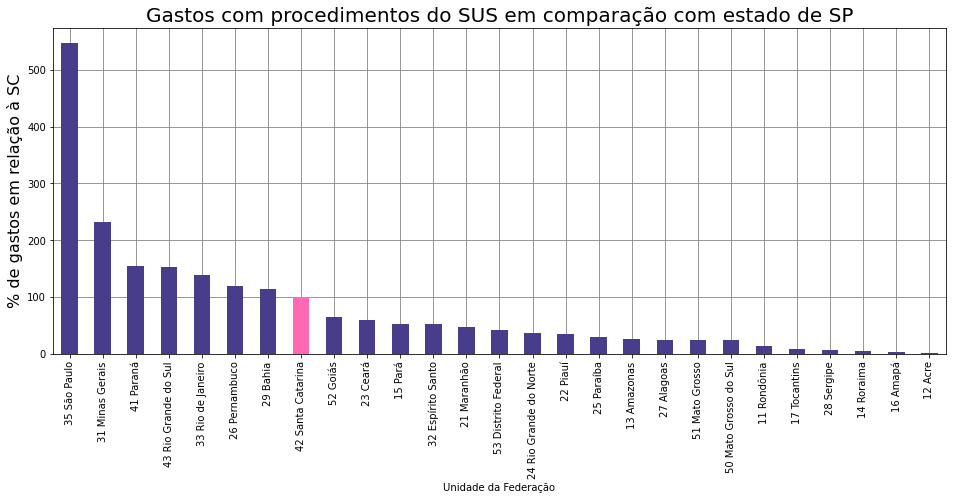

In [86]:
# O que foi feito diferente nessa daqui é o parâmetro (color = gastos_mais_recentes["Cor"])
#que foram estabelecidas as cores na coluna 


ax = ((gastos_do_mais_recente1['2020/Jul']/gastos_do_mais_recente1.loc["42 Santa Catarina"][0])*100).sort_values(ascending = False).plot(kind = "bar", figsize = (16,6), color = gastos_do_mais_recente1["Cor"])
ax.set_title("Gastos com procedimentos do SUS em comparação com estado de SP", fontsize = 20)
ax.set_ylabel("% de gastos em relação à SC", fontsize = 16)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color="gray")
plt.show()

###Desafio 15: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [87]:
# Criação de um df com os dados de população

# Ler o arquivo da estimativa populacional de 2020 que foi divulgado no DOU (Diário Oficial da União)
dados_populacao = pd.read_csv("https://raw.githubusercontent.com/letpires/bootcamp_alura/main/dados/estimativa_dou_2020.csv",encoding="ISO-8859-1",
                              skiprows=3, skipfooter = 7, thousands=".", sep = ";", engine = "python")

# Tratando os dados, retirando as informações que não são uteis para o uso nesse estudo
dados_populacao.dropna(axis = 1, inplace = True)
dados_populacao.columns = ["UF", "Populacao"]
dados_populacao.set_index("UF",inplace = True)


dados_populacao

Populacao
UF                            
Rondônia               1796460
Acre                    894470
Amazonas               4207714
Roraima                 631181
Pará                   8690745
Amapá                   861773
Tocantins              1590248
Maranhão               7114598
Piauí                  3281480
Ceará                  9187103
Rio Grande do Norte    3534165
Paraíba                4039277
Pernambuco             9616621
Alagoas                3351543
Sergipe                2318822
Bahia                 14930634
Minas Gerais          21292666
Espírito Santo         4064052
Rio de Janeiro        17366189
São Paulo             46289333
Paraná                11516840
Santa Catarina         7252502
Rio Grande do Sul     11422973
Mato Grosso do Sul     2809394
Mato Grosso            3526220
Goiás                  7113540
Distrito Federal       3055149

In [88]:
# Retirando as 3 primeiras letras, ou seja, o número + espaço, de todas
# as labels dos Estados
ufs = gastos_do_mais_recente1.index
ufs_sem_numero = []
for uf in ufs:
  uf_sem_numero = uf[3:]
  ufs_sem_numero.append(uf_sem_numero)

gastos_do_mais_recente1.head()

2020/Jul            Cor
Unidade da Federação                         
35 São Paulo            282.71  darkslateblue
31 Minas Gerais         120.47  darkslateblue
41 Paraná                80.32  darkslateblue
43 Rio Grande do Sul     78.93  darkslateblue
33 Rio de Janeiro        71.54  darkslateblue

In [89]:
# Adequando os dados de gastos do SUS para poder unir os dois dfs

# Renomeando o index, para retirar os números de labels
gastos_do_mais_recente1.index = [ufs_sem_numero]

# Colocando um index genérico para poder fazer merge através da coluna de nomes de UFs
gastos_do_mais_recente1.reset_index(inplace=True)

# Renoemando as colunas
gastos_do_mais_recente1.columns = ["UF", "2020/Jul", "Cor"]

# Retirar a coluna de cores, pois não é útil para esse estudo
gastos_do_mais_recente1.drop(labels =["Cor"],axis = 1, inplace = True)

# Multiplicando novamente por 1milhão para retornar aos valores originais de gastos reais no mês de Julho
gastos_do_mais_recente1['2020/Jul'] = gastos_do_mais_recente1['2020/Jul']*1000000

gastos_do_mais_recente1.head()

UF       2020/Jul
0          São Paulo 282,709,570.31
1       Minas Gerais 120,467,187.34
2             Paraná  80,320,852.69
3  Rio Grande do Sul  78,929,703.81
4     Rio de Janeiro  71,540,227.33

In [90]:
# Criação de um novo df realizando a merge dos dois dfs, o de gastos do mês de Julho de 2020 e a estimativa da população também de Jul de 2020 

populacao_e_gasto = pd.merge(left = gastos_do_mais_recente1,right = dados_populacao, on = "UF", how = "left")
populacao_e_gasto

UF       2020/Jul  Populacao
0             São Paulo 282,709,570.31   46289333
1          Minas Gerais 120,467,187.34   21292666
2                Paraná  80,320,852.69   11516840
3     Rio Grande do Sul  78,929,703.81   11422973
4        Rio de Janeiro  71,540,227.33   17366189
5            Pernambuco  62,325,444.34    9616621
6                 Bahia  58,898,100.40   14930634
7        Santa Catarina  51,764,534.76    7252502
8                 Goiás  33,499,284.38    7113540
9                 Ceará  30,809,221.22    9187103
10                 Pará  27,618,727.51    8690745
11       Espírito Santo  27,460,475.47    4064052
12             Maranhão  24,374,205.15    7114598
13     Distrito Federal  22,233,542.26    3055149
14  Rio Grande do Norte  19,593,057.45    3534165
15                Piauí  18,019,214.49    3281480
16              Paraíba  15,491,469.06    4039277
17             Amazonas  13,358,514.02    4207714
18              Alagoas  13,087,850.40    3351543
19          Mato Grosso  13,083,151.70    3526220
20   Mato Grosso do Sul  12,508,717.35    2809394
21             Rondônia   7,407,388.24    1796460
22            Tocantins   4,489,665.87    1590248
23              Sergipe   3,312,766.32    2318822
24              Roraima   2,739,498.41     631181
25                Amapá   2,155,083.37     861773
26                 Acre   1,163,813.08     894470

In [91]:
# Criação de uma nova coluna que calcula o gasto de procedimentos do SUS por habitante. 

populacao_e_gasto["gasto_por_habitante"] = populacao_e_gasto["2020/Jul"]/populacao_e_gasto["Populacao"]
populacao_e_gasto.set_index("UF",inplace = True)
populacao_e_gasto.head()

2020/Jul  Populacao  gasto_por_habitante
UF                                                              
São Paulo         282,709,570.31   46289333                 6.11
Minas Gerais      120,467,187.34   21292666                 5.66
Paraná             80,320,852.69   11516840                 6.97
Rio Grande do Sul  78,929,703.81   11422973                 6.91
Rio de Janeiro     71,540,227.33   17366189                 4.12

###Desafio 16: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

#**<font color="darkslateblue">MÓDULO 02**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados

##<font color="hotpink">**Aula 01. Fontes externas, limpeza e manupulação de dados**
---



In [92]:
#Pegar informações de fontes diferentes de csv ou xls
#Utilizando uma tabela do wikipedia com estimativa da população por unidade federativa
#https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

dados_populacao



Populacao
UF                            
Rondônia               1796460
Acre                    894470
Amazonas               4207714
Roraima                 631181
Pará                   8690745
Amapá                   861773
Tocantins              1590248
Maranhão               7114598
Piauí                  3281480
Ceará                  9187103
Rio Grande do Norte    3534165
Paraíba                4039277
Pernambuco             9616621
Alagoas                3351543
Sergipe                2318822
Bahia                 14930634
Minas Gerais          21292666
Espírito Santo         4064052
Rio de Janeiro        17366189
São Paulo             46289333
Paraná                11516840
Santa Catarina         7252502
Rio Grande do Sul     11422973
Mato Grosso do Sul     2809394
Mato Grosso            3526220
Goiás                  7113540
Distrito Federal       3055149

In [93]:
dados_populacao_wiki = """ Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958) """

In [94]:
from io import StringIO

dados_populacao_wiki_io = StringIO (dados_populacao_wiki)

populacao= pd.read_csv(dados_populacao_wiki_io, sep="\t")
populacao = populacao.dropna()
populacao["populacao"]=populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"]=populacao["Unidade federativa"]
populacao=populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

populacao
uf                        
 São Paulo        46289333
 Minas Gerais     21331292
 Rio de Janeiro   17366189
Bahia Bahia       14930634
 Paraná           11516840

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [95]:
populacao.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Go', ' Ma', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='uf')

In [96]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [97]:
populacao.head()

populacao
uf                        
 São Paulo        46289333
 Minas Gerais     21331292
 Rio de Janeiro   17366189
Bahia Bahia       14930634
 Paraná           11516840

In [98]:
populacao.join(gastos_do_mais_recente)

populacao  2020/Jul
uf                                       
 São Paulo             46289333       nan
 Minas Gerais          21331292       nan
 Rio de Janeiro        17366189       nan
Bahia Bahia            14930634       nan
 Paraná                11516840       nan
 Rio Grande do Sul     11422973       nan
 Pernambuco             9616621       nan
 Ceará                  9187103       nan
Pará Pará               8690745       nan
 Santa Catarina         7279638       nan
 Goiás                  7142070       nan
 Maranhão               7127460       nan
 Amazonas               4228381       nan
 Espírito Santo         4064052       nan
 Paraíba                4039277       nan
 Rio Grande do Norte    3534165       nan
 Mato Grosso            3526220       nan
 Alagoas                3351543       nan
 Piauí                  3281480       nan
 Distrito Federal       3055149       nan
 Mato Grosso do Sul     2809394       nan
 Sergipe                2318822       nan
 Rondônia               1796460       nan
 Tocantins              1590248       nan
 Acre                    894470       nan
 Amapá                   861773       nan
 Roraima                 631181       nan

In [99]:
#Problema invisivel do porque o join não deu certo. Tem um espaço antes da palavra

populacao.index[0]

' São Paulo'

In [100]:
populacao.index = populacao.index.str.strip()
populacao.head()

populacao
uf                       
São Paulo        46289333
Minas Gerais     21331292
Rio de Janeiro   17366189
Bahia Bahia      14930634
Paraná           11516840

In [101]:
populacao.join(gastos_do_mais_recente)

populacao  2020/Jul
uf                                      
São Paulo             46289333    282.71
Minas Gerais          21331292    120.47
Rio de Janeiro        17366189     71.54
Bahia Bahia           14930634       nan
Paraná                11516840     80.32
Rio Grande do Sul     11422973     78.93
Pernambuco             9616621     62.33
Ceará                  9187103     30.81
Pará Pará              8690745       nan
Santa Catarina         7279638     51.76
Goiás                  7142070     33.50
Maranhão               7127460     24.37
Amazonas               4228381     13.36
Espírito Santo         4064052     27.46
Paraíba                4039277     15.49
Rio Grande do Norte    3534165     19.59
Mato Grosso            3526220     13.08
Alagoas                3351543     13.09
Piauí                  3281480     18.02
Distrito Federal       3055149     22.23
Mato Grosso do Sul     2809394     12.51
Sergipe                2318822      3.31
Rondônia               1796460      7.41
Tocantins              1590248      4.49
Acre                    894470      1.16
Amapá                   861773      2.16
Roraima                 631181      2.74

In [102]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [103]:
gastos_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_populacao_recente.head()

populacao  2020/Jul
uf                                 
São Paulo        46289333    282.71
Minas Gerais     21331292    120.47
Rio de Janeiro   17366189     71.54
Bahia            14930634     58.90
Paraná           11516840     80.32

###Desafio 01: Ler a base de dados do Wikipedia de maneira diferente.

In [104]:
URL_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1'

In [105]:
df_uf_populacao = pd.read_html(io=URL_wiki)[0]
df_uf_populacao.head()

Posição Unidade federativa  ... % da pop. total País comparável (habitantes)
0        1          São Paulo  ...           21,9%         Espanha (46 439 864)
1        2       Minas Gerais  ...           10,1%       Sri Lanka (20 675 000)
2        3     Rio de Janeiro  ...            8,2%   Países Baixos (16 922 900)
3        4              Bahia  ...            7,1%           Chade (14 037 000)
4        5             Paraná  ...            5,4%         Bolívia (11 410 651)

[5 rows x 5 columns]

###Desafio 02: Padronizar o nome das colunas, transformar os dados em tipos corretos e transformar a UF em index.

In [106]:
df_uf_populacao['População'] = df_uf_populacao['População'].str.replace(' ', '').astype('float64')

In [107]:
df_uf_populacao['% da pop. total'] = df_uf_populacao['% da pop. total'].str[:-1].str.replace(',', '.').astype('float64')

In [108]:
df_uf_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Posição                       27 non-null     int64  
 1   Unidade federativa            27 non-null     object 
 2   População                     27 non-null     float64
 3   % da pop. total               27 non-null     float64
 4   País comparável (habitantes)  27 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [109]:
df_uf_populacao.set_index("Unidade federativa", inplace=True)
df_uf_populacao.head()

Posição  ...  País comparável (habitantes)
Unidade federativa           ...                              
São Paulo                 1  ...          Espanha (46 439 864)
Minas Gerais              2  ...        Sri Lanka (20 675 000)
Rio de Janeiro            3  ...    Países Baixos (16 922 900)
Bahia                     4  ...            Chade (14 037 000)
Paraná                    5  ...          Bolívia (11 410 651)

[5 rows x 4 columns]

###Desafio 03: Estudar mais sobre o tratamento de Strings.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isdecimal.html#pandas-series-str-isdecimal

In [110]:
df_uf_populacao['País comparável (habitantes)'].str.isdigit()

Unidade federativa
São Paulo              False
Minas Gerais           False
Rio de Janeiro         False
Bahia                  False
Paraná                 False
Rio Grande do Sul      False
Pernambuco             False
Ceará                  False
Pará                   False
Santa Catarina         False
Maranhão               False
Goiás                  False
Amazonas               False
Espírito Santo         False
Paraíba                False
Rio Grande do Norte    False
Mato Grosso            False
Alagoas                False
Piauí                  False
Distrito Federal       False
Mato Grosso do Sul     False
Sergipe                False
Rondônia               False
Tocantins              False
Acre                   False
Amapá                  False
Roraima                False
Name: País comparável (habitantes), dtype: bool

###Desafio 04: Desenvolver uma função para a limpeza e tratamento dos dados retornando duas tabelas "população" e "unida".

In [111]:
def limpar_unir_dfs(dados1, dados2):
  dados1 = dados1.dropna().copy()
  dados1["populacao"] = dados1["População"].str.replace(" ", "").astype(int)
  dados1["uf"] = dados1["Unidade federativa"]
  dados1 = dados1[["populacao", "uf"]].set_index("uf")
  dados1.index = dados1.index.str.strip()

  for estado in dados2.index:
    dados1.index = dados1.index.str.replace(f"{estado} {estado}", estado)

  return dados1.join(dados2)

In [112]:
dados_populacao_wiki_io = StringIO(dados_populacao_wiki)
populacao = pd.read_csv(dados_populacao_wiki_io, sep="\t")
gastos_e_populacao_recente = limpar_unir_dfs(populacao, gastos_do_mais_recente)

In [113]:
gastos_e_populacao_recente.head()

populacao  2020/Jul
uf                                 
São Paulo        46289333    282.71
Minas Gerais     21331292    120.47
Rio de Janeiro   17366189     71.54
Bahia            14930634     58.90
Paraná           11516840     80.32

##<font color="hotpink">**Aula 02. Proporcionalidade e Seaborn**
---

In [114]:
def insere_gastos_e_gasto_por_habitante_para (todos_os_gastos, dados, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados[f"gasto_por_habitante_{mes}"]=dados[f"gastos_{mes}"] / dados["populacao"]

In [115]:
dados_usaveis.head()

2008/Fev  2008/Mar  ...  2020/Jun  2020/Jul
Unidade da Federação                      ...                    
35 São Paulo            172.83    170.48  ...    299.06    282.71
31 Minas Gerais          70.30     79.12  ...    135.98    120.47
41 Paraná                48.86     55.61  ...     92.90     80.32
43 Rio Grande do Sul     45.90     52.93  ...     89.02     78.93
33 Rio de Janeiro        44.12     42.89  ...     77.60     71.54

[5 rows x 150 columns]

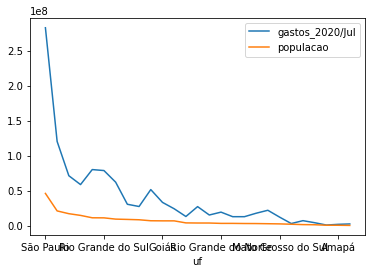

In [116]:
dados_usaveis.index = dados_usaveis.index.str[3:]
insere_gastos_e_gasto_por_habitante_para(dados_usaveis, gastos_populacao_recente, "2020/Jul")
gastos_populacao_recente[["gastos_2020/Jul", "populacao"]].plot()

In [117]:
gastos_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Jul
uf                         ...                              
São Paulo        46289333  ...                          6.11
Minas Gerais     21331292  ...                          5.65
Rio de Janeiro   17366189  ...                          4.12
Bahia            14930634  ...                          3.94
Paraná           11516840  ...                          6.97

[5 rows x 4 columns]

In [118]:
dados_ordenado_por_total["2020/Jul"]

Unidade da Federação
35 São Paulo             282,709,570.31
31 Minas Gerais          120,467,187.34
41 Paraná                 80,320,852.69
43 Rio Grande do Sul      78,929,703.81
33 Rio de Janeiro         71,540,227.33
29 Bahia                  58,898,100.40
26 Pernambuco             62,325,444.34
42 Santa Catarina         51,764,534.76
23 Ceará                  30,809,221.22
52 Goiás                  33,499,284.38
15 Pará                   27,618,727.51
21 Maranhão               24,374,205.15
32 Espírito Santo         27,460,475.47
24 Rio Grande do Norte    19,593,057.45
25 Paraíba                15,491,469.06
53 Distrito Federal       22,233,542.26
50 Mato Grosso do Sul     12,508,717.35
22 Piauí                  18,019,214.49
27 Alagoas                13,087,850.40
51 Mato Grosso            13,083,151.70
13 Amazonas               13,358,514.02
28 Sergipe                 3,312,766.32
17 Tocantins               4,489,665.87
11 Rondônia                7,407,388.24
12 Acre            

In [119]:
gastos_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]


populacao  ...  gasto_por_habitante_2020/Jul
uf                            ...                              
Rio Grande do Sul   11422973  ...                          6.91
São Paulo           46289333  ...                          6.11

[2 rows x 4 columns]

Percebe-se através dos cálculos que RS e SP estão gastando quase a mesma coisa, porém no gráfico não conseguimos visualizar essa informação.

In [120]:
78929703.81/11422973


6.909733902899009

In [121]:
282709570.31/46289333

6.107445322446102

In [122]:
gastos_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Jul
uf                         ...                              
São Paulo        46289333  ...                          6.11
Minas Gerais     21331292  ...                          5.65
Rio de Janeiro   17366189  ...                          4.12
Bahia            14930634  ...                          3.94
Paraná           11516840  ...                          6.97

[5 rows x 4 columns]

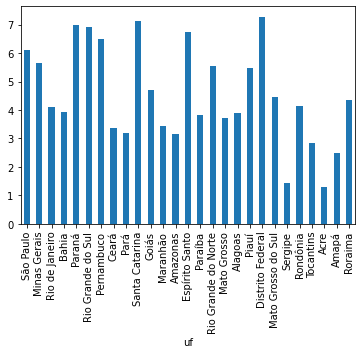

In [123]:
#O estado que mais gasta, que é São Paulo, não é o que mais gasta por habitantes, e o gráfico mostra isso.

gastos_populacao_recente["gasto_por_habitante_2020/Jul"].plot(kind='bar')

In [124]:
import seaborn as sns


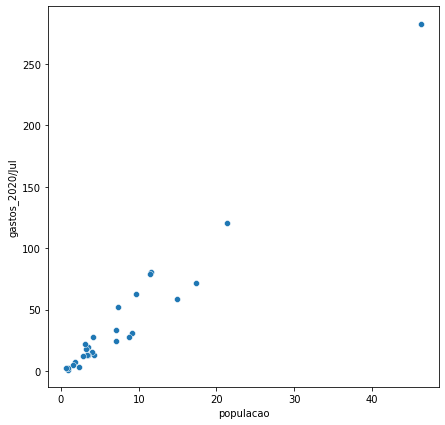

In [125]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jul")

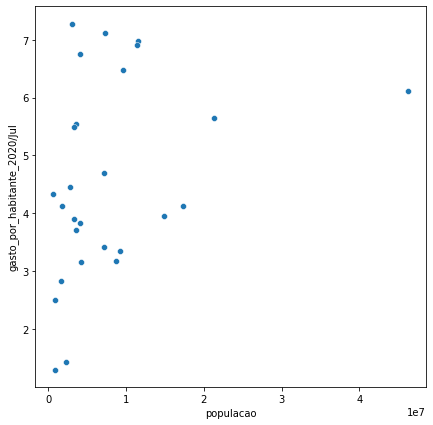

In [126]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jul")

In [127]:
dados_usaveis.head()

2008/Fev  2008/Mar  ...  2020/Jun  2020/Jul
Unidade da Federação                      ...                    
São Paulo               172.83    170.48  ...    299.06    282.71
Minas Gerais             70.30     79.12  ...    135.98    120.47
Paraná                   48.86     55.61  ...     92.90     80.32
Rio Grande do Sul        45.90     52.93  ...     89.02     78.93
Rio de Janeiro           44.12     42.89  ...     77.60     71.54

[5 rows x 150 columns]

In [128]:
insere_gastos_e_gasto_por_habitante_para(dados_usaveis, gastos_populacao_recente, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(dados_usaveis, gastos_populacao_recente, "2020/Mai")
gastos_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Mai
uf                         ...                              
São Paulo        46289333  ...                          6.54
Minas Gerais     21331292  ...                          6.42
Rio de Janeiro   17366189  ...                          4.97
Bahia            14930634  ...                          4.14
Paraná           11516840  ...                          9.21

[5 rows x 8 columns]

In [129]:
#dados_ordenado_por_total = dados_ordenado_por_total/1000000

In [130]:
insere_gastos_e_gasto_por_habitante_para(dados_usaveis, gastos_populacao_recente, "2020/Jun")
gastos_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Mai
uf                         ...                              
São Paulo        46289333  ...                          6.54
Minas Gerais     21331292  ...                          6.42
Rio de Janeiro   17366189  ...                          4.97
Bahia            14930634  ...                          4.14
Paraná           11516840  ...                          9.21

[5 rows x 8 columns]

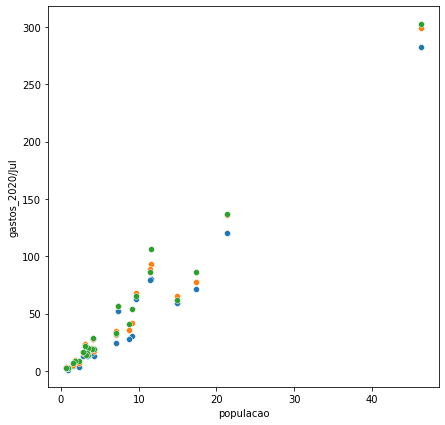

In [131]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jul")
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jun")
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Mai")

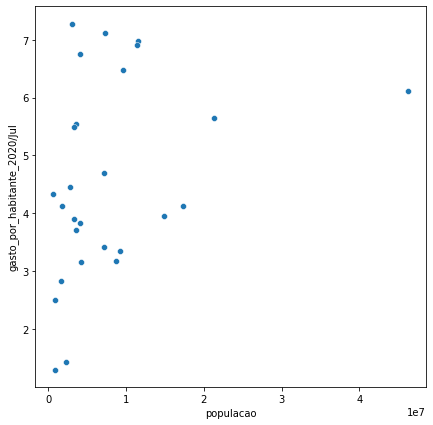

In [132]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jul")


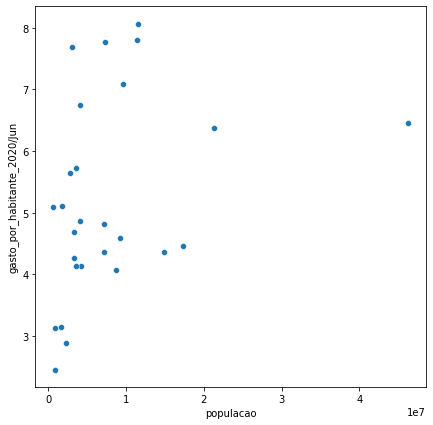

In [133]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jun")

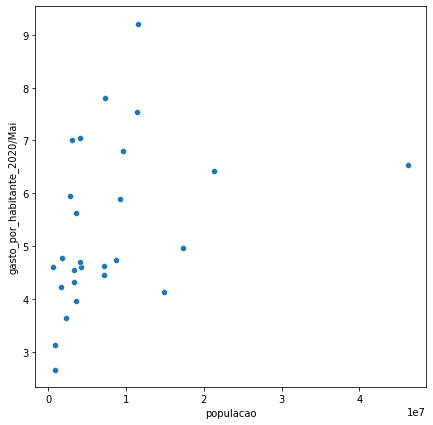

In [134]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Mai")

###Desafio 05: Ordenar o gráfico e criar um visualização de gastos por habitante ordenada.

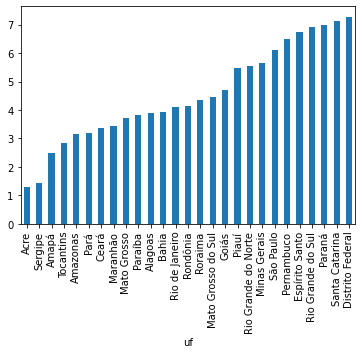

In [135]:
gastos_populacao_recente["gasto_por_habitante_2020/Jul"].sort_values().plot(kind='bar')

###Desafio 06: Fazer os mesmos gráficos para meses anteriores, analisar e compartilhar as hipóteses.

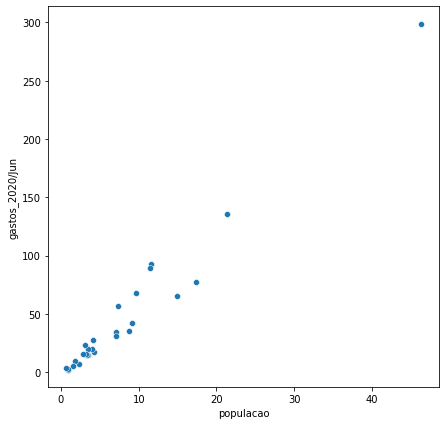

In [136]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jun")

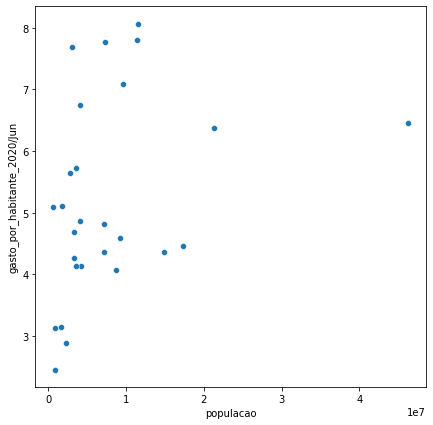

In [137]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jun")

###Desafio 07: Plotar nos mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar hipóteses.

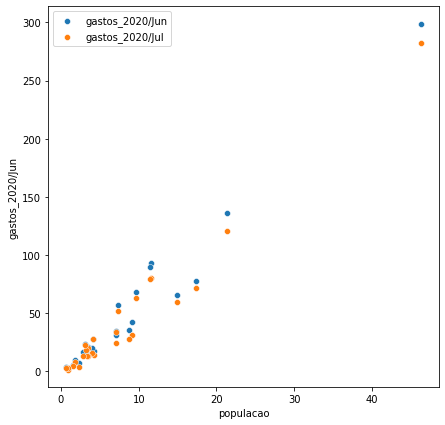

In [138]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jun", label='gastos_2020/Jun')
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jul", label='gastos_2020/Jul')

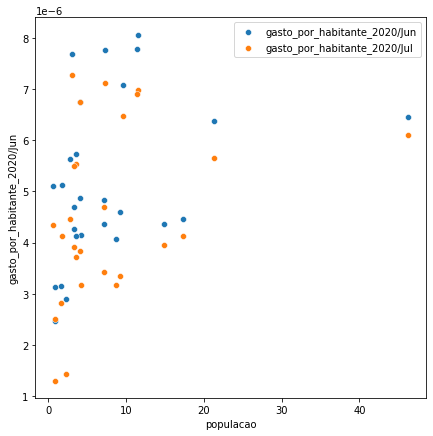

In [139]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gasto_por_habitante_2020/Jun", label='gasto_por_habitante_2020/Jun')
sns.scatterplot(data=gastos_populacao_recente / 1000000, x="populacao", y="gasto_por_habitante_2020/Jul", label='gasto_por_habitante_2020/Jul')

###Desafio 08: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo com os dados.

##**<font color="hotpink">Aula 03.Ticks, escalas e formatação de imagens**

In [140]:
mensal = dados_usaveis.T
mensal.head()

Unidade da Federação  São Paulo  Minas Gerais  Paraná  ...  Acre  Roraima  Amapá
2008/Fev                 172.83         70.30   48.86  ...  1.74     0.77   1.28
2008/Mar                 170.48         79.12   55.61  ...  2.06     0.88   1.18
2008/Abr                 170.28         79.05   56.12  ...  2.06     0.90   1.40
2008/Mai                 172.40         79.27   55.57  ...  2.23     1.03   1.41
2008/Jun                 175.42         79.61   56.09  ...  2.11     0.94   1.42

[5 rows x 27 columns]

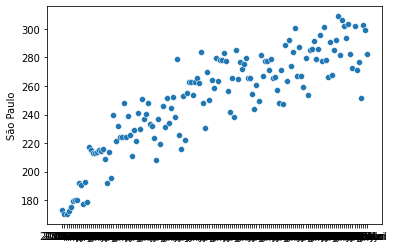

In [141]:
sns.scatterplot(data=mensal, x= mensal.index, y="São Paulo")

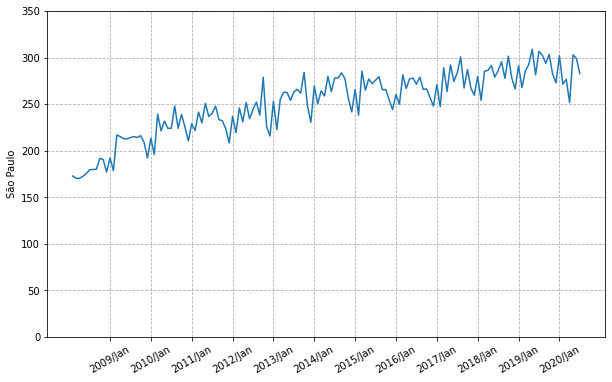

In [142]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0,350)

#AutoLocator centraliza e deixa um espaço
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(True, linestyle="--")
plt.show()

###Desafio 09: Fazer o scatterplot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

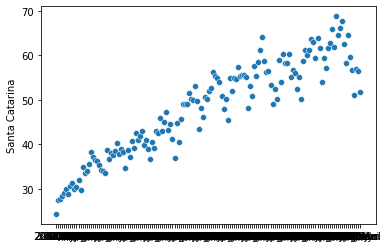

In [143]:
sns.scatterplot(data=mensal, x=mensal.index, y="Santa Catarina")

###Desafio 10: Formatar eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar título nos 2 eixos, alterando o tamanho dos títulos.

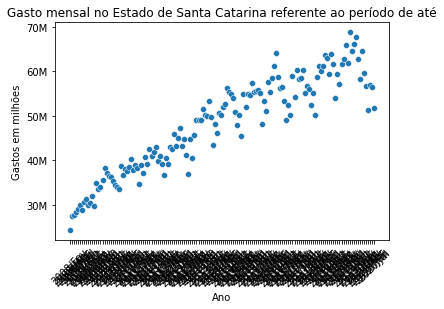

In [144]:
ax = sns.scatterplot(data=mensal, x=mensal.index, y="Santa Catarina")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}M"))
ax.set_title("Gasto mensal no Estado de Santa Catarina referente ao período de até")
ax.set_xlabel("Ano")
ax.set_ylabel("Gastos em milhões")
plt.xticks(rotation = 45)
plt.show()

##**<font color="hotpink">Aula 04.Trabalhando com DateTime e Melt**

In [145]:
from datetime import date

meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano,mes_numero,1)


mensal.index=mensal.index.map(para_dia)
mensal.head()

Unidade da Federação  São Paulo  Minas Gerais  Paraná  ...  Acre  Roraima  Amapá
2008-02-01               172.83         70.30   48.86  ...  1.74     0.77   1.28
2008-03-01               170.48         79.12   55.61  ...  2.06     0.88   1.18
2008-04-01               170.28         79.05   56.12  ...  2.06     0.90   1.40
2008-05-01               172.40         79.27   55.57  ...  2.23     1.03   1.41
2008-06-01               175.42         79.61   56.09  ...  2.11     0.94   1.42

[5 rows x 27 columns]

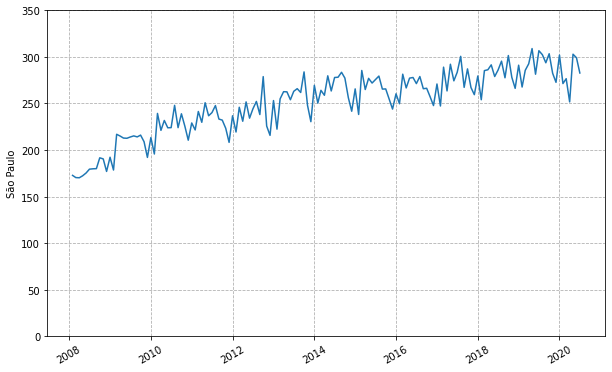

In [146]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0,350)

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(True, linestyle="--")
plt.show()

In [147]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

In [148]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

dia_mes_ano         uf  gasto
0  2008-02-01  São Paulo 172.83
1  2008-03-01  São Paulo 170.48
2  2008-04-01  São Paulo 170.28
3  2008-05-01  São Paulo 172.40
4  2008-06-01  São Paulo 175.42

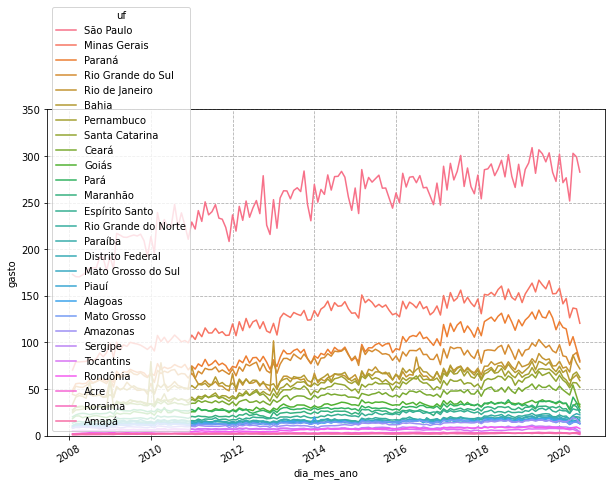

In [149]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="dia_mes_ano", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0,350)

plt.grid(True, linestyle="--")
plt.show()

###Desafio 11: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar, faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

https://docs.python.org/3/library/datetime.html

###Desafio 12: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora volte atrás partindo do mensal_aberto chegando no mensal.

In [150]:
mensal_aberto.pivot(index='dia_mes_ano', columns='uf', values='gasto').head()

uf           Acre  Alagoas  Amapá  ...  Sergipe  São Paulo  Tocantins
dia_mes_ano                        ...                               
2008-02-01   1.74     8.11   1.28  ...     4.64     172.83       5.05
2008-03-01   2.06     9.21   1.18  ...     5.02     170.48       5.20
2008-04-01   2.06    10.47   1.40  ...     5.27     170.28       5.34
2008-05-01   2.23     9.84   1.41  ...     5.37     172.40       5.34
2008-06-01   2.11    10.29   1.42  ...     4.98     175.42       5.40

[5 rows x 27 columns]

###Desafio 13: melhorar o gráfico
- muitos estados, escolha os estados
- paleta de cores (7 cores?)
-posição da legenda
- titulo e titulo dos eixos

In [175]:
estados_escolhidos = mensal_aberto.uf.unique()[:8]
estados_escolhidos

array(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina'],
      dtype=object)

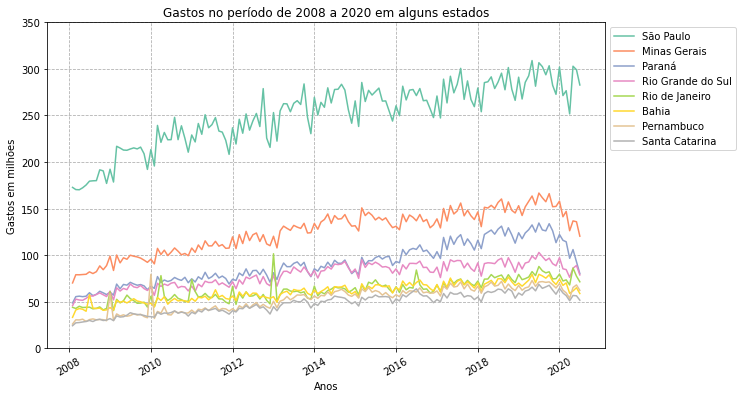

In [177]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query('uf in @estados_escolhidos'),
                  x="dia_mes_ano", y="gasto", hue="uf", palette='Set2')
plt.xticks(rotation=30)
ax.set_title("Gastos no período de 2008 a 2020 em alguns estados")
ax.set_xlabel("Anos")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

##**<font color="hotpink">Aula 05.Manipulando datas e gerando novas análises**

In [151]:
mensal_aberto.head()

dia_mes_ano         uf  gasto
0  2008-02-01  São Paulo 172.83
1  2008-03-01  São Paulo 170.48
2  2008-04-01  São Paulo 170.28
3  2008-05-01  São Paulo 172.40
4  2008-06-01  São Paulo 175.42

In [152]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

dia_mes_ano         uf  gasto  mes   ano
0  2008-02-01  São Paulo 172.83    2  2008
1  2008-03-01  São Paulo 170.48    3  2008
2  2008-04-01  São Paulo 170.28    4  2008
3  2008-05-01  São Paulo 172.40    5  2008
4  2008-06-01  São Paulo 175.42    6  2008

In [153]:
mensal_aberto.query("uf=='São Paulo'")

dia_mes_ano         uf  gasto  mes   ano
0    2008-02-01  São Paulo 172.83    2  2008
1    2008-03-01  São Paulo 170.48    3  2008
2    2008-04-01  São Paulo 170.28    4  2008
3    2008-05-01  São Paulo 172.40    5  2008
4    2008-06-01  São Paulo 175.42    6  2008
..          ...        ...    ...  ...   ...
145  2020-03-01  São Paulo 276.61    3  2020
146  2020-04-01  São Paulo 251.70    4  2020
147  2020-05-01  São Paulo 302.86    5  2020
148  2020-06-01  São Paulo 299.06    6  2020
149  2020-07-01  São Paulo 282.71    7  2020

[150 rows x 5 columns]

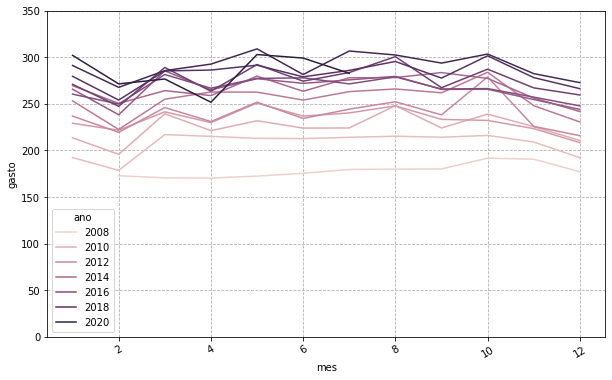

In [154]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0,350)

plt.grid(True, linestyle="--")
plt.show()

OBS: É possível observar que em Fevereiro teve uma queda, e isso só acontece porque em fevereiro tem menos dias.

###Desafio 14: Melhorar gráfico ano a ano, mudar palete de cor, colocar títulos, adicionar ticks com o nome de cada mês no eixo x.

In [178]:
labels = ['Jan', 'Fev', 'Mar', 'Abr',
          'Mai', 'Jun', 'Jul', 'Ago',
          'Set', 'Out', 'Nov', 'Dez']
x = np.arange(1,len(labels)+1)

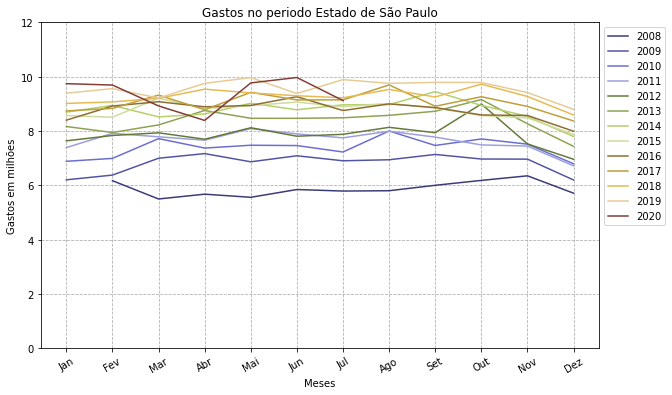

In [179]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes",
                  y="gasto_diario", hue="ano",  palette='tab20b')
plt.xticks(rotation=30)
ax.set_title("Gastos no periodo Estado de São Paulo")
ax.set_xlabel("Meses")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 12)
plt.grid(linestyle="--")

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

### Desafio 15: Pegar dois estados de climas diferentes (estação de chuva diferente) e plotar as diversas linhas deles. Comparar picos. Gerar gráficos separados e conjuntos.

In [180]:
mensal_aberto.uf.unique()

array(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo',
       'Rio Grande do Norte', 'Paraíba', 'Distrito Federal',
       'Mato Grosso do Sul', 'Piauí', 'Alagoas', 'Mato Grosso',
       'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre', 'Roraima',
       'Amapá'], dtype=object)

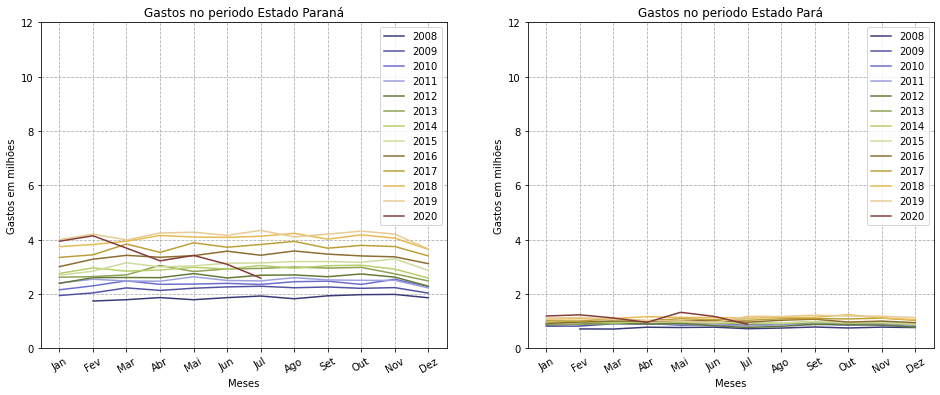

In [181]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Paraná'"), x="mes",
                  y="gasto_diario", hue="ano",  palette='tab20b')
plt.xticks(rotation=30)
ax.set_title("Gastos no periodo Estado Paraná")
ax.set_xlabel("Meses")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 12)
plt.grid(linestyle="--")

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.subplot(122)
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Pará'"), x="mes",
                  y="gasto_diario", hue="ano",  palette='tab20b')
plt.xticks(rotation=30)
ax.set_title("Gastos no periodo Estado Pará")
ax.set_xlabel("Meses")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 12)
plt.grid(linestyle="--")

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

In [155]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [156]:
#Milhões gastos por dia

mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

dia_mes_ano         uf  gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172.83    2  2008          6.17
1  2008-03-01  São Paulo 170.48    3  2008          5.50
2  2008-04-01  São Paulo 170.28    4  2008          5.68
3  2008-05-01  São Paulo 172.40    5  2008          5.56
4  2008-06-01  São Paulo 175.42    6  2008          5.85

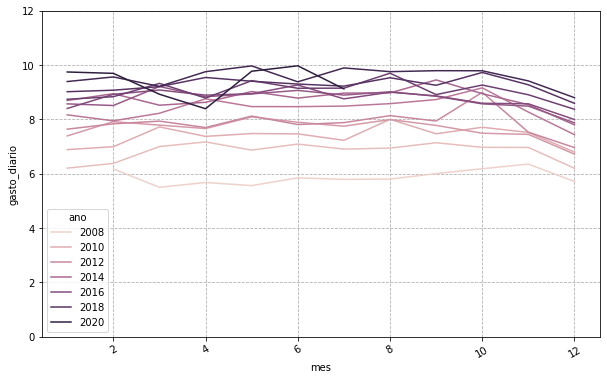

In [157]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0,12)

plt.grid(True, linestyle="--")
plt.show()

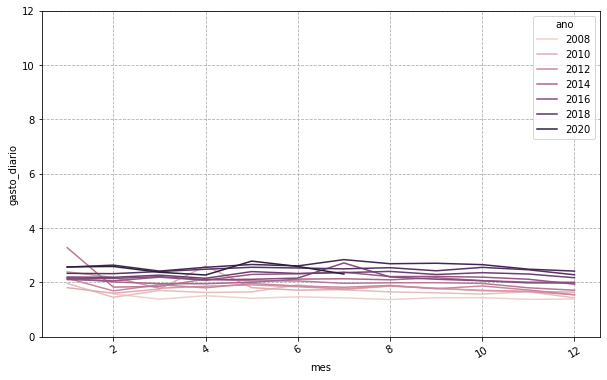

In [158]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0,12)

plt.grid(True, linestyle="--")
plt.show()

##**<font color="hotpink">Aula 06.Agrupando dados e analisando por categoria**

In [159]:
estado_a_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_a_analisar.head()

dia_mes_ano         uf  gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172.83    2  2008          6.17
1  2008-03-01  São Paulo 170.48    3  2008          5.50
2  2008-04-01  São Paulo 170.28    4  2008          5.68
3  2008-05-01  São Paulo 172.40    5  2008          5.56
4  2008-06-01  São Paulo 175.42    6  2008          5.85

In [160]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

gasto  mes  gasto_diario
ano                             
2008 1,960.23   77         64.60
2009 2,489.03   78         81.82
2010 2,696.62   78         88.63
2011 2,794.55   78         91.91
2012 2,873.97   78         94.47

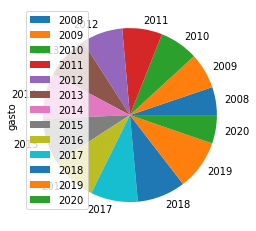

In [161]:
gastos_por_ano.plot(kind = 'pie', y = 'gasto')

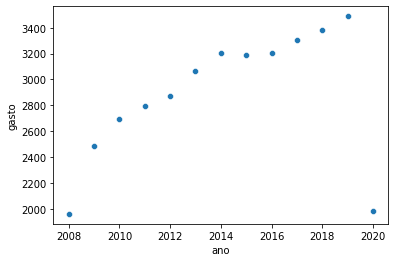

In [162]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

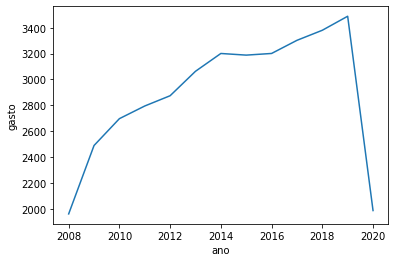

In [163]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

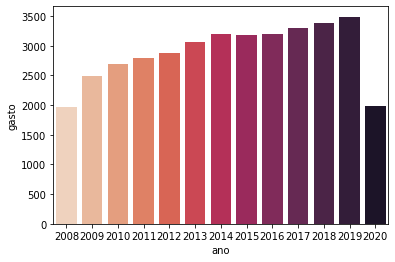

In [164]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("rocket_r",13))
#tom de cor ordenado por valor

In [165]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf", "ano"]).sum().reset_index()
por_ano_dos_estados.head()

uf   ano    gasto  mes  gasto_diario
0  Minas Gerais  2008   894.35   77         29.44
1  Minas Gerais  2009 1,149.14   78         37.77
2  Minas Gerais  2010 1,217.49   78         40.03
3  Minas Gerais  2011 1,315.02   78         43.24
4  Minas Gerais  2012 1,408.35   78         46.29

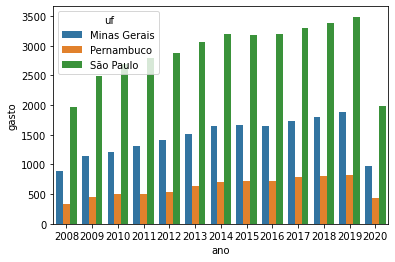

In [166]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

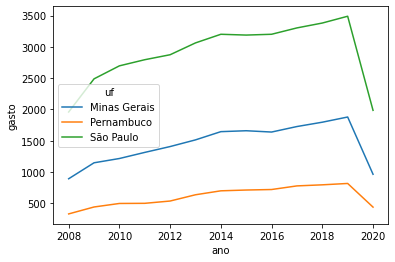

In [167]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

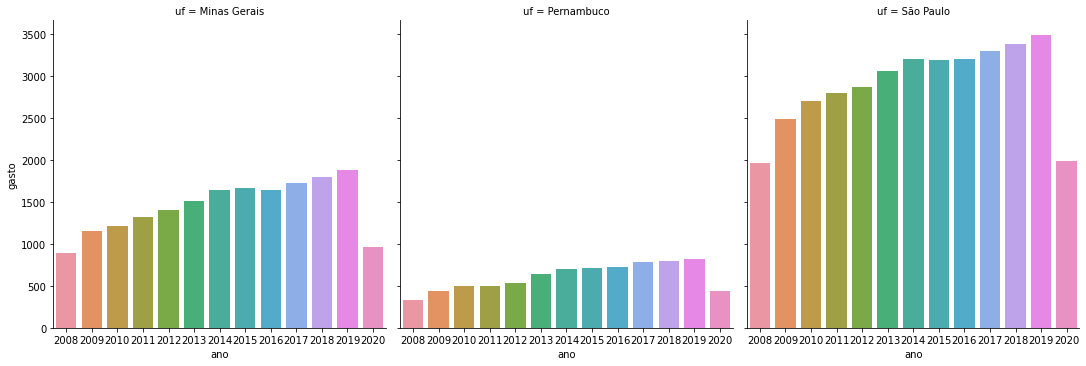

In [168]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", col="uf")

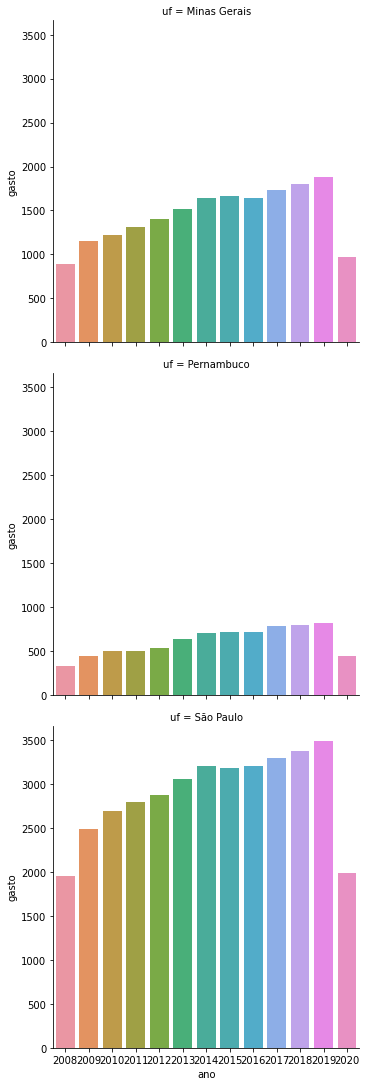

In [169]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", row="uf")

###Desafio 17: reordenar as cores pelo valor do eixo y

In [182]:
gastos_ordenados = gastos_por_ano['gasto'].rank(method='max').astype(int)

In [183]:
index_ordenados = gastos_ordenados -1
colors = sns.color_palette("rocket_r", 13)
palette = [colors[x] for x in index_ordenados]

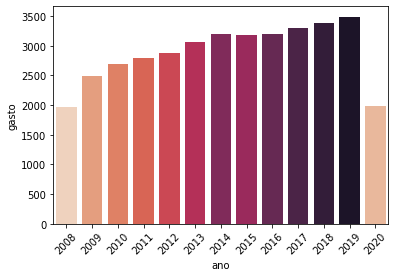

In [184]:
ax = sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=palette)
plt.xticks(rotation = 45)
plt.show()

###Desafio: explorar documentação(API) do seaborn, matplotlib